# Superstore Sales


This appears to be a retail sales dataset with the following characteristics:

1. **Size**: 9,800 rows and 18 columns
2. **Content**: Retail sales transactions
3. **Key Column Types**:
   - Order information (Order ID, Order Date, Ship Date, Ship Mode)
   - Customer information (Customer ID, Customer Name, Segment)
   - Location data (Country, City, State, Postal Code, Region)
   - Product information (Product ID, Category, Sub-Category, Product Name)
   - Financial data (Sales)

The dataset seems structured to track retail sales across different products, customers, and regions. This type of data is commonly used for:
- Sales analysis and forecasting
- Customer segmentation
- Regional performance evaluation
- Product category analysis
- Shipping efficiency assessment


## Importing The Libraries

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from IPython.display import display
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("Superstore Sales Dataset.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [15]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [16]:
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)
df['Postal Code'] = df['Postal Code'].astype(int)

In [17]:
text_columns = ['Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())

In [18]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

df['Outlier'] = (df['Sales'] < outlier_threshold_low) | (df['Sales'] > outlier_threshold_high)

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')

In [20]:
# Cheka For Null Values  
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Outlier          0
dtype: int64

In [21]:
print(df.duplicated().sum())

0


In [22]:
display(df.describe())

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [23]:
df.columns = df.columns.str.strip()

In [24]:
obj_cols = df.select_dtypes(include=['object']).columns

for col in obj_cols:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)

Column: Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: Order ID, Length: 4922, dtype: int64
--------------------------------------------------
Column: Ship Mode
standard class    5859
second class      1902
first class       1501
same day           538
Name: Ship Mode, dtype: int64
--------------------------------------------------
Column: Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: Customer ID, Length: 793, dtype: int64
--------------------------------------------------
Column: Customer Name
william brown          35
matt abelman           34
paul prost             34
john lee               33
chloris kastensmidt    32
                       ..
jocasta 

In [25]:
df.drop(["Country","Row ID"], axis=1, inplace=True)
categorical_col = ["Segment", "State", "Region", "Category", "Sub-Category"]
df[categorical_col] = df[categorical_col].astype("category")

In [26]:
# df.to_csv("Clean_data.csv")

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Order YearMonth'] = df['Order Date'].dt.strftime('%Y-%m')
df['Order YearQuarter'] = df['Order Year'].astype(str) + '-Q' + df['Order Quarter'].astype(str)

In [28]:
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")

print("\nClean Dataset Preview:")
df.head()


Missing Values:
Series([], dtype: int64)

Number of duplicates: 1

Clean Dataset Preview:


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Outlier,Order Year,Order Month,Order Quarter,Order YearMonth,Order YearQuarter,Shipping Days
0,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,claire gute,consumer,henderson,kentucky,42420,...,bookcases,bush somerset collection bookcase,261.9600,False,2017,11,4,2017-11,2017-Q4,3
1,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,claire gute,consumer,henderson,kentucky,42420,...,chairs,"hon deluxe fabric upholstered stacking chairs,...",731.9400,True,2017,11,4,2017-11,2017-Q4,3
2,CA-2017-138688,2017-06-12,2017-06-16,second class,DV-13045,darrin van huff,corporate,los angeles,california,90036,...,labels,self-adhesive address labels for typewriters b...,14.6200,False,2017,6,2,2017-06,2017-Q2,4
3,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,sean o'donnell,consumer,fort lauderdale,florida,33311,...,tables,bretford cr4500 series slim rectangular table,957.5775,True,2016,10,4,2016-10,2016-Q4,7
4,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,sean o'donnell,consumer,fort lauderdale,florida,33311,...,storage,eldon fold 'n roll cart system,22.3680,False,2016,10,4,2016-10,2016-Q4,7


## 2. Exploratory Data Analysis

### 2.1 Sales Overview

In [29]:
# Total sales statistics
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
min_sales = df['Sales'].min()
max_sales = df['Sales'].max()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sale: ${avg_sales:.2f}")
print(f"Median Sale: ${median_sales:.2f}")
print(f"Minimum Sale: ${min_sales:.2f}")
print(f"Maximum Sale: ${max_sales:.2f}")


Total Sales: $2,261,536.78
Average Sale: $230.77
Median Sale: $54.49
Minimum Sale: $0.44
Maximum Sale: $22638.48


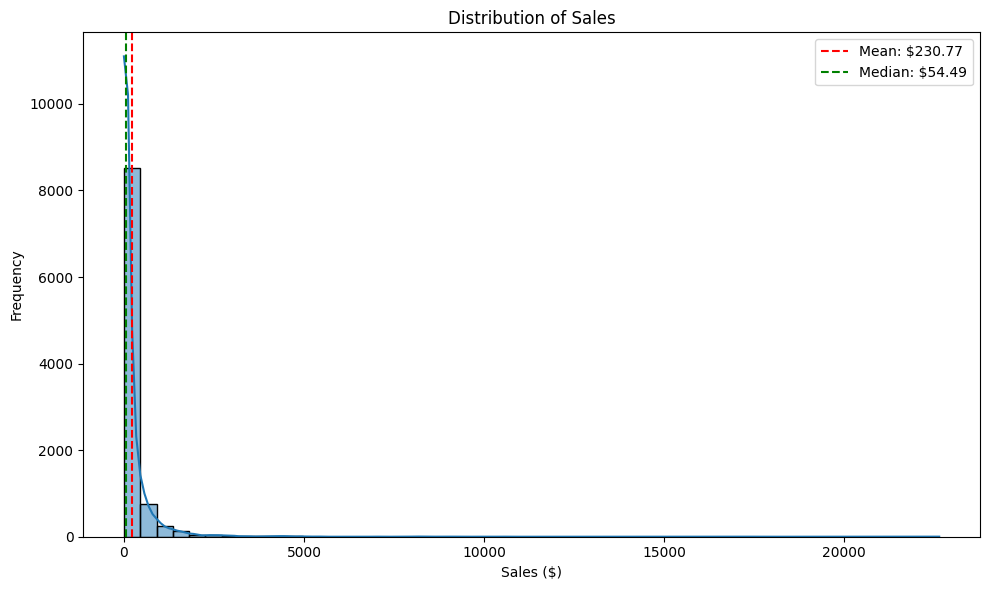

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.axvline(avg_sales, color='red', linestyle='--', label=f'Mean: ${avg_sales:.2f}')
plt.axvline(median_sales, color='green', linestyle='--', label=f'Median: ${median_sales:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

### 2.2 Sales by Category

In [31]:
# Sales by product category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()
category_count = df.groupby('Category').size().reset_index(name='Count')
category_avg = df.groupby('Category')['Sales'].mean().reset_index(name='Average Sale')

print("Sales by Category:")
for category, sales in zip(category_sales['Category'], category_sales['Sales']):
    print(f"{category}: ${sales:,.2f}")

Sales by Category:
technology: $827,455.87
furniture: $728,658.58
office supplies: $705,422.33


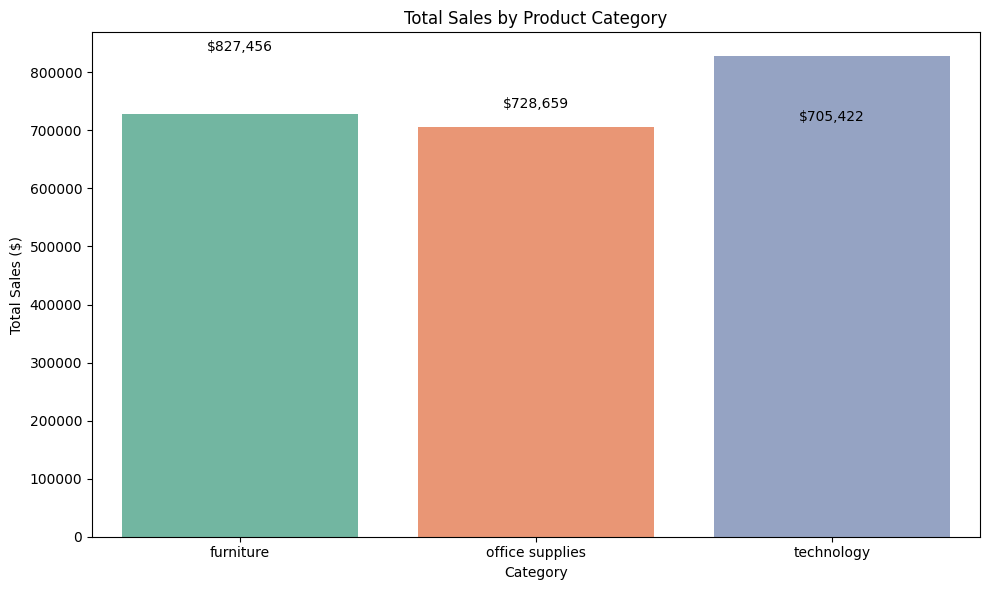

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='Set2')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
for i, sales in enumerate(category_sales['Sales']):
    plt.text(i, sales + 10000, f"${sales:,.0f}", ha='center')
plt.tight_layout()
plt.show()

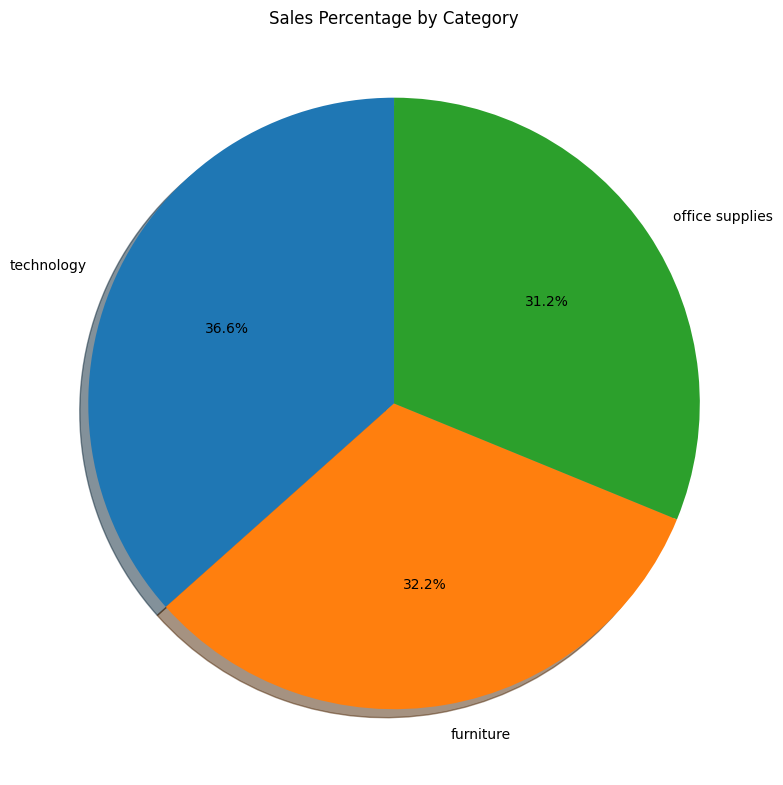

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Sales Percentage by Category')
plt.axis('equal')
plt.tight_layout()
plt.show()


### 2.3 Sales by Sub-Category

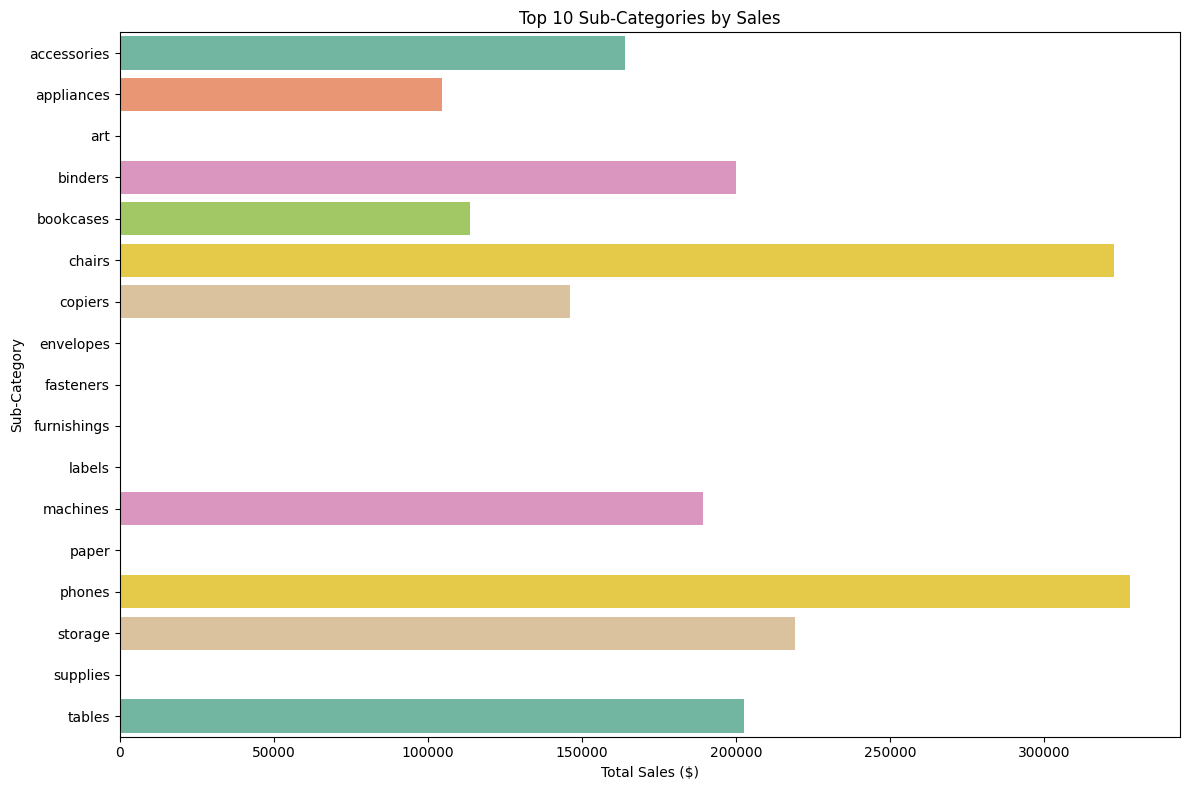

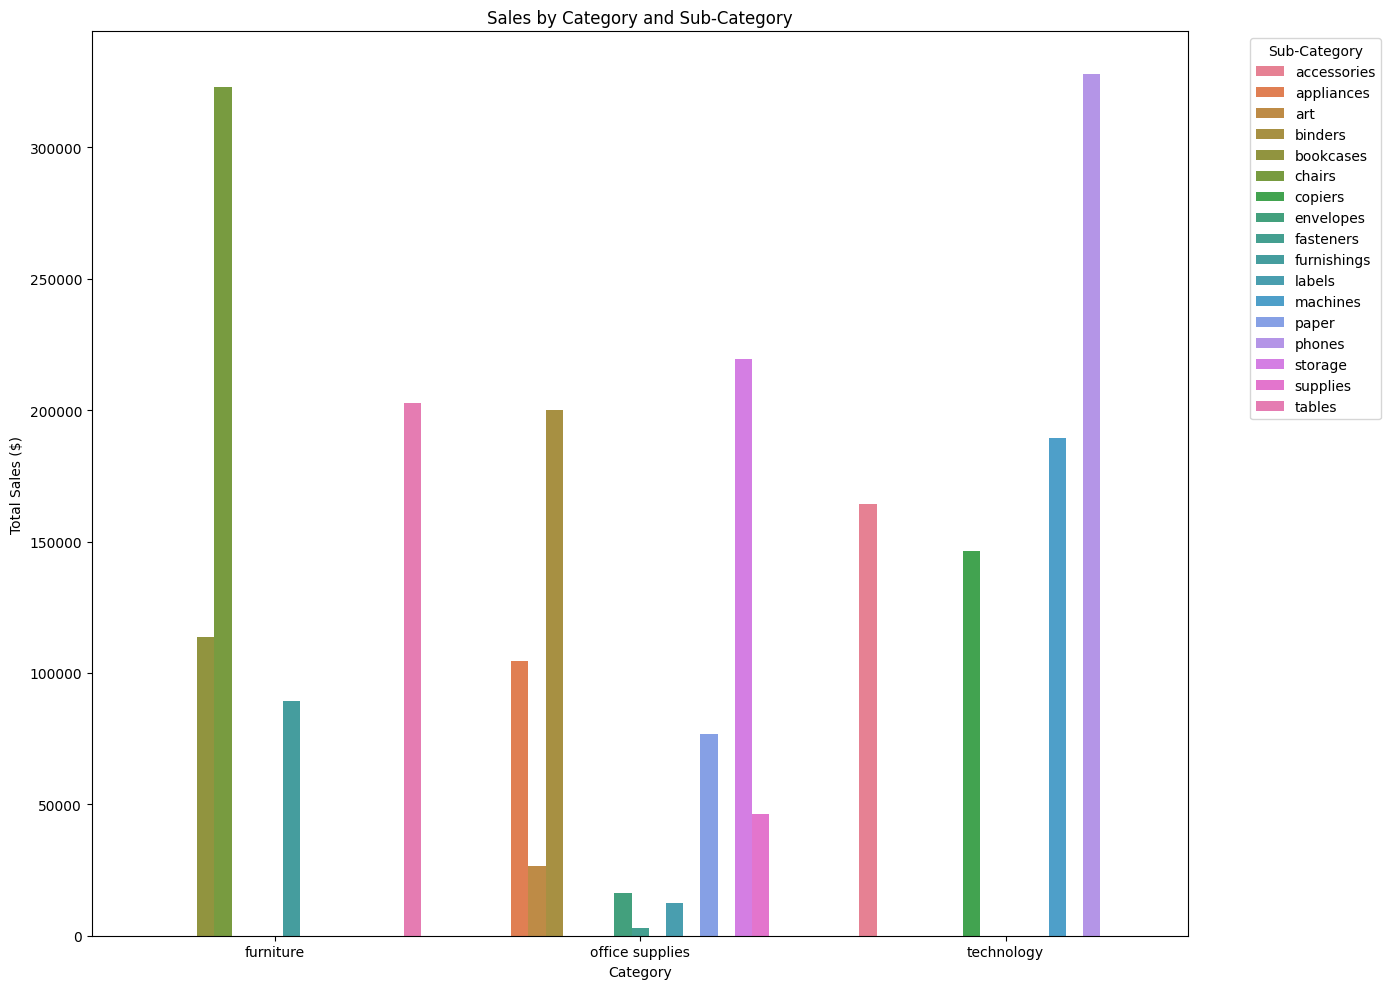

In [34]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Top 10 sub-categories by sales
top_10_subcategories = subcategory_sales.head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Sales', y='Sub-Category', data=top_10_subcategories, palette='Set2')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=category_subcategory)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 2.4 Customer Segment Analysis


Sales by Customer Segment:
consumer: $1,148,060.53
corporate: $688,494.07
home office: $424,982.18


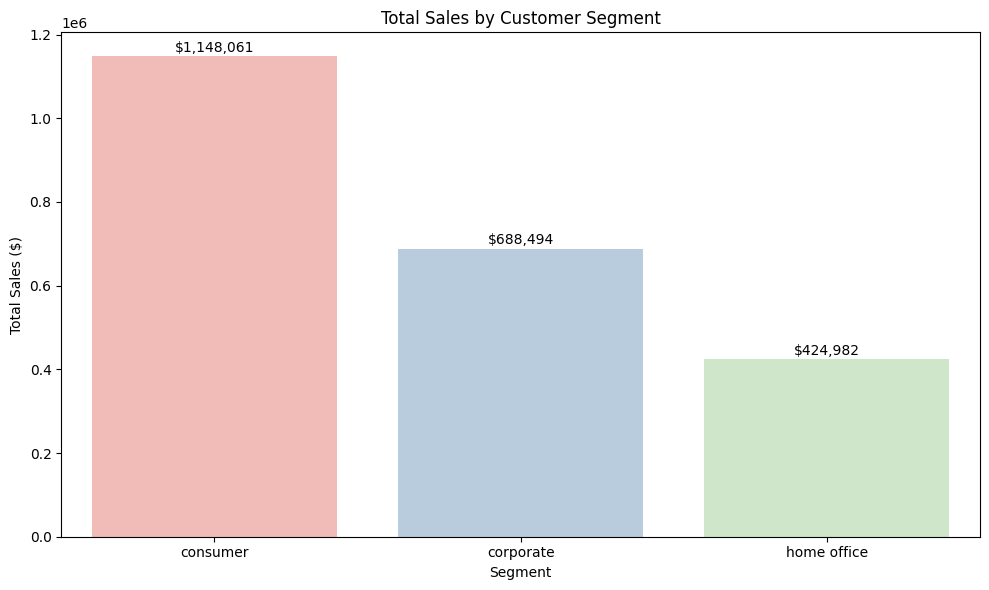

In [35]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).reset_index()

print("\nSales by Customer Segment:")
for segment, sales in zip(segment_sales['Segment'], segment_sales['Sales']):
    print(f"{segment}: ${sales:,.2f}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales, palette='Pastel1')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales ($)')
for i, sales in enumerate(segment_sales['Sales']):
    plt.text(i, sales + 10000, f"${sales:,.0f}", ha='center')
plt.tight_layout()
plt.show()

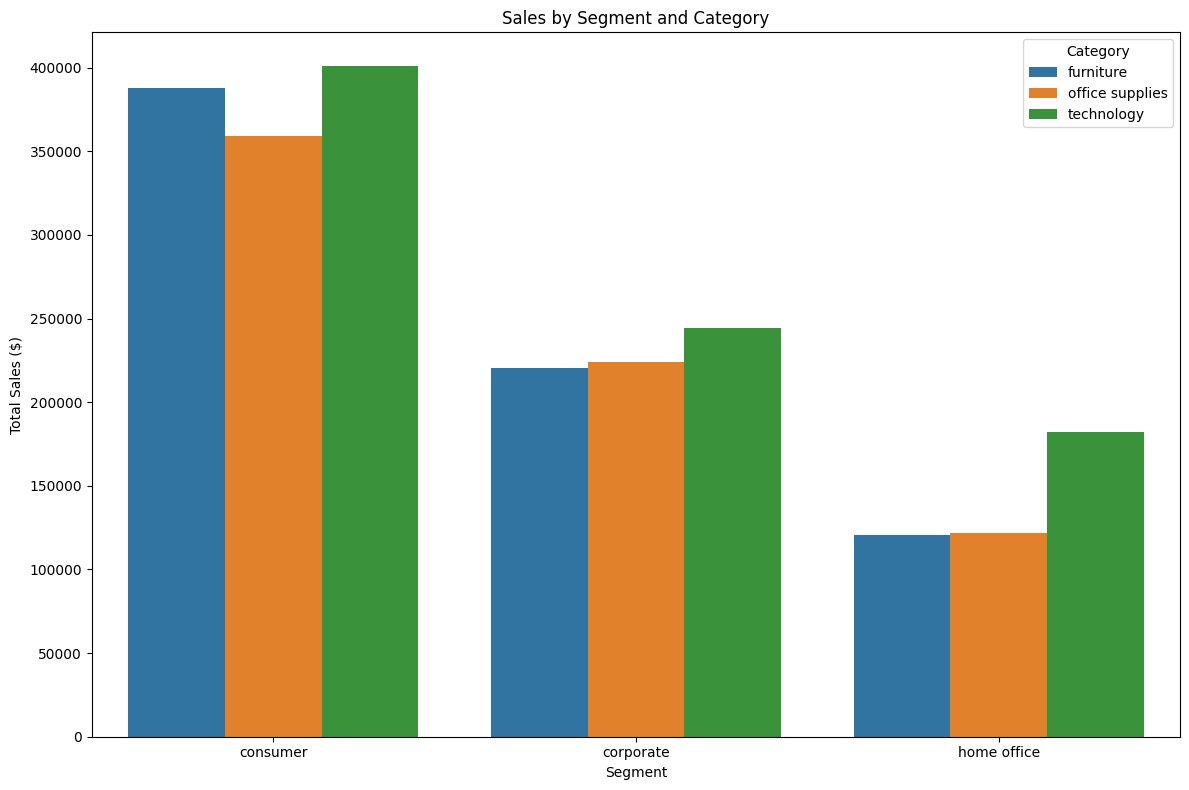

In [36]:
# Segment sales by category
segment_category = df.groupby(['Segment', 'Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Sales', hue='Category', data=segment_category)
plt.title('Sales by Segment and Category')
plt.xlabel('Segment')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()

### 2.5 Time Series Analysis

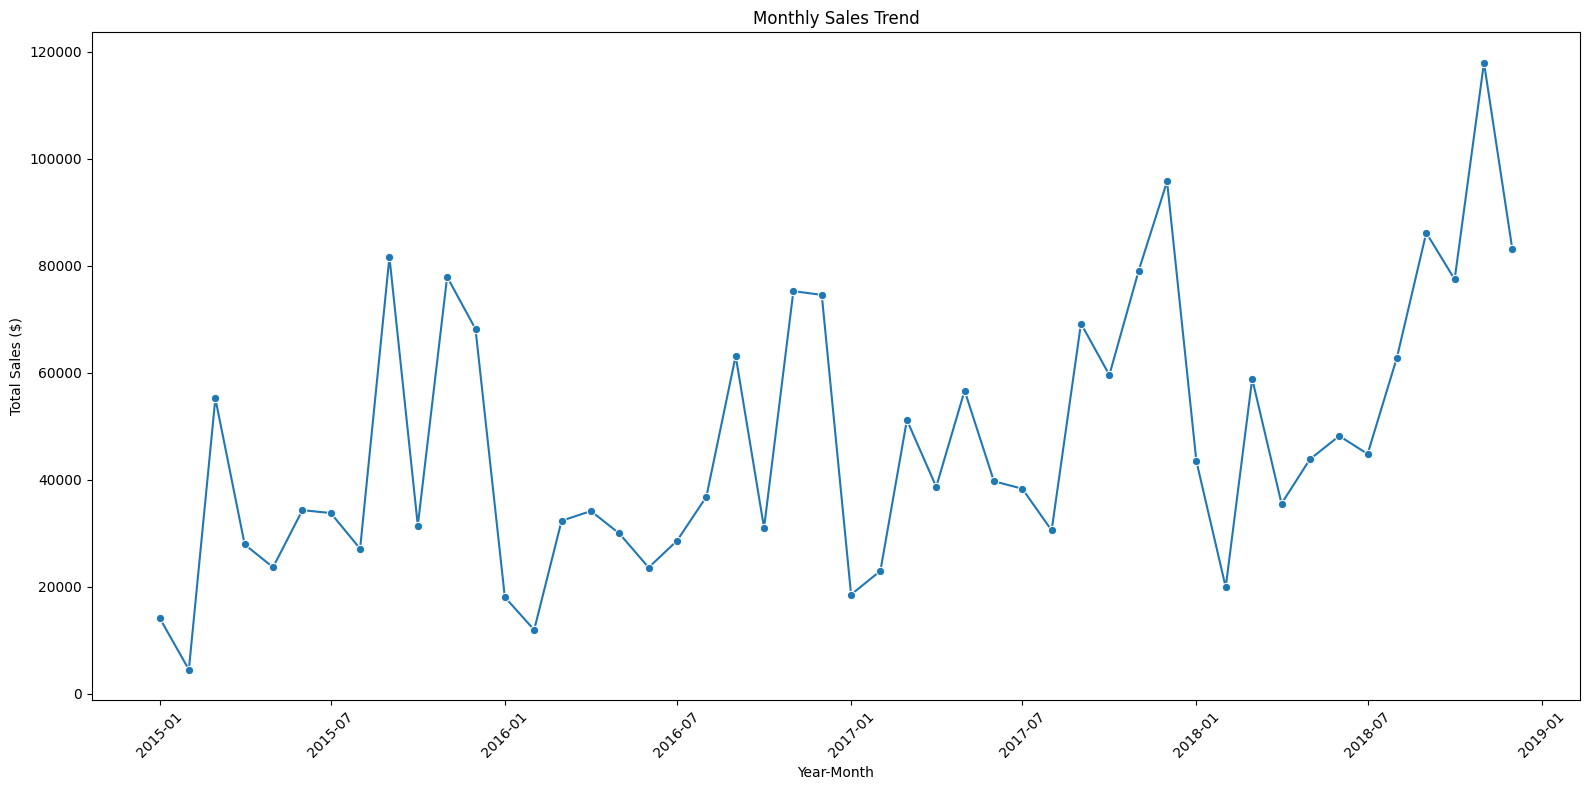

In [37]:
# Monthly sales trend
monthly_sales = df.groupby('Order YearMonth')['Sales'].sum().reset_index()
monthly_sales['Order YearMonth'] = pd.to_datetime(monthly_sales['Order YearMonth'])
monthly_sales = monthly_sales.sort_values('Order YearMonth')

plt.figure(figsize=(16, 8))
sns.lineplot(x='Order YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


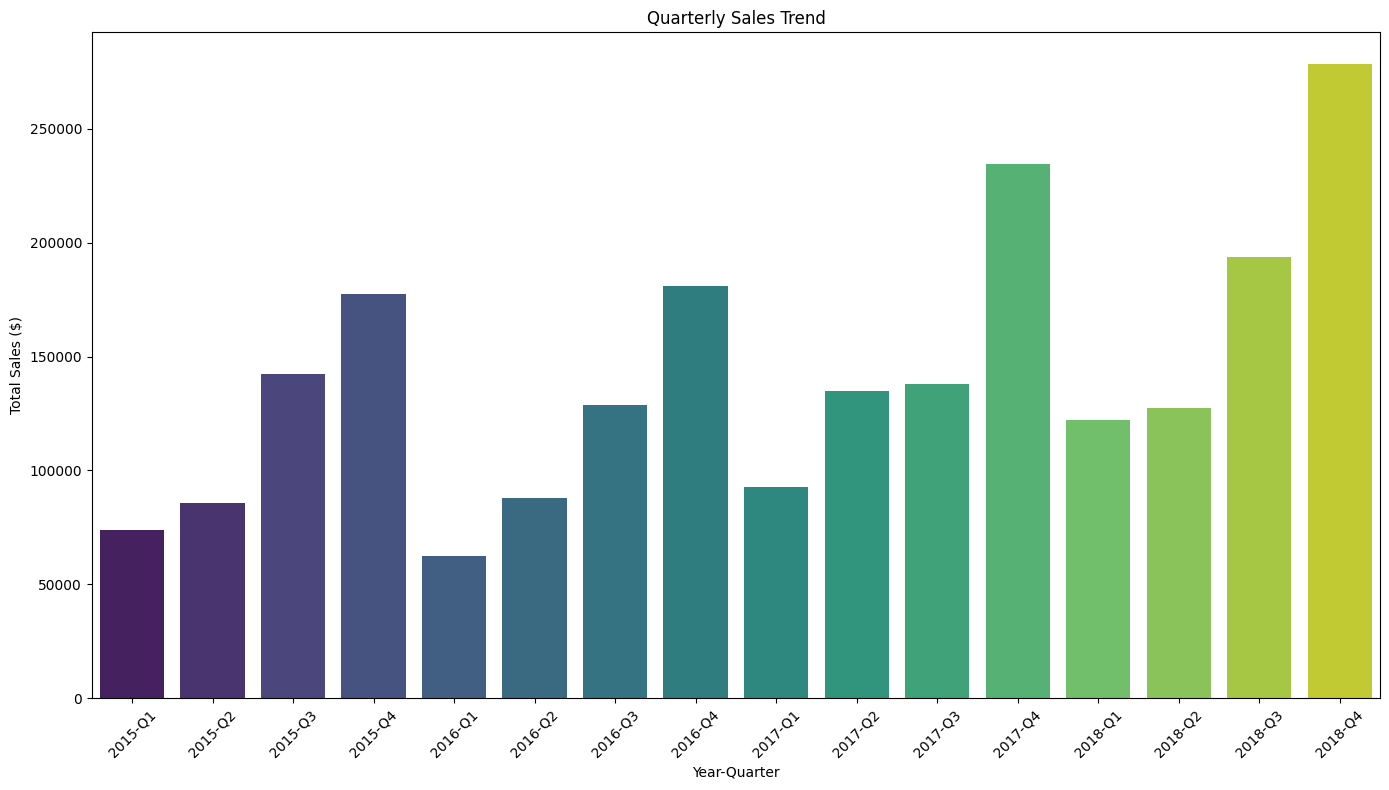

In [38]:
# Quarterly sales trend
quarterly_sales = df.groupby('Order YearQuarter')['Sales'].sum().reset_index()
# Sort quarters chronologically
quarterly_sales['Year'] = quarterly_sales['Order YearQuarter'].str.split('-').str[0].astype(int)
quarterly_sales['Quarter'] = quarterly_sales['Order YearQuarter'].str.split('-Q').str[1].astype(int)
quarterly_sales = quarterly_sales.sort_values(['Year', 'Quarter'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Order YearQuarter', y='Sales', data=quarterly_sales, palette='viridis')
plt.title('Quarterly Sales Trend')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

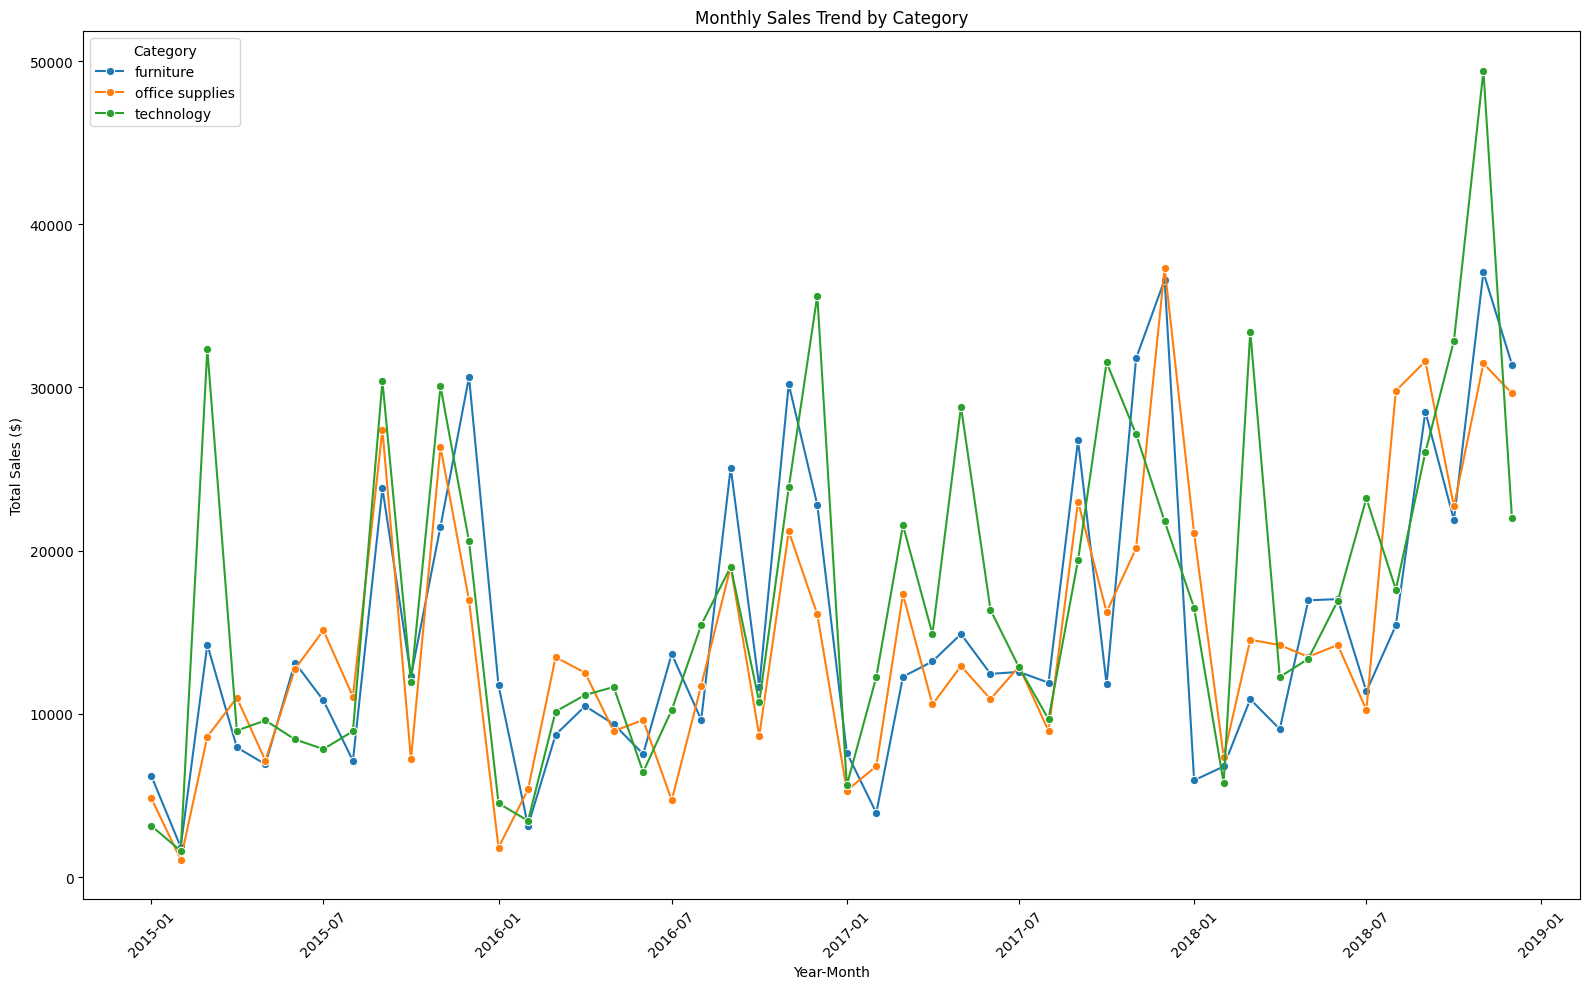

In [39]:
# Monthly sales by category
monthly_category = df.groupby(['Order YearMonth', 'Category'])['Sales'].sum().reset_index()
monthly_category['Order YearMonth'] = pd.to_datetime(monthly_category['Order YearMonth'])
monthly_category = monthly_category.sort_values('Order YearMonth')

plt.figure(figsize=(16, 10))
sns.lineplot(x='Order YearMonth', y='Sales', hue='Category', data=monthly_category, marker='o')
plt.title('Monthly Sales Trend by Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### 2.6 Shipping Analysis

In [40]:
# Analysis of shipping modes
shipping_count = df.groupby('Ship Mode').size().reset_index(name='Count')
shipping_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()
shipping_days = df.groupby('Ship Mode')['Shipping Days'].mean().reset_index()

merged_shipping = shipping_count.merge(shipping_sales, on='Ship Mode').merge(shipping_days, on='Ship Mode')
merged_shipping['Percentage'] = (merged_shipping['Count'] / merged_shipping['Count'].sum()) * 100

print("\nShipping Mode Analysis:")
print(merged_shipping)


Shipping Mode Analysis:
        Ship Mode  Count         Sales  Shipping Days  Percentage
0     first class   1501  3.455723e+05       2.179214   15.316327
1        same day    538  1.252190e+05       0.044610    5.489796
2    second class   1902  4.499142e+05       3.249211   19.408163
3  standard class   5859  1.340831e+06       5.008363   59.785714


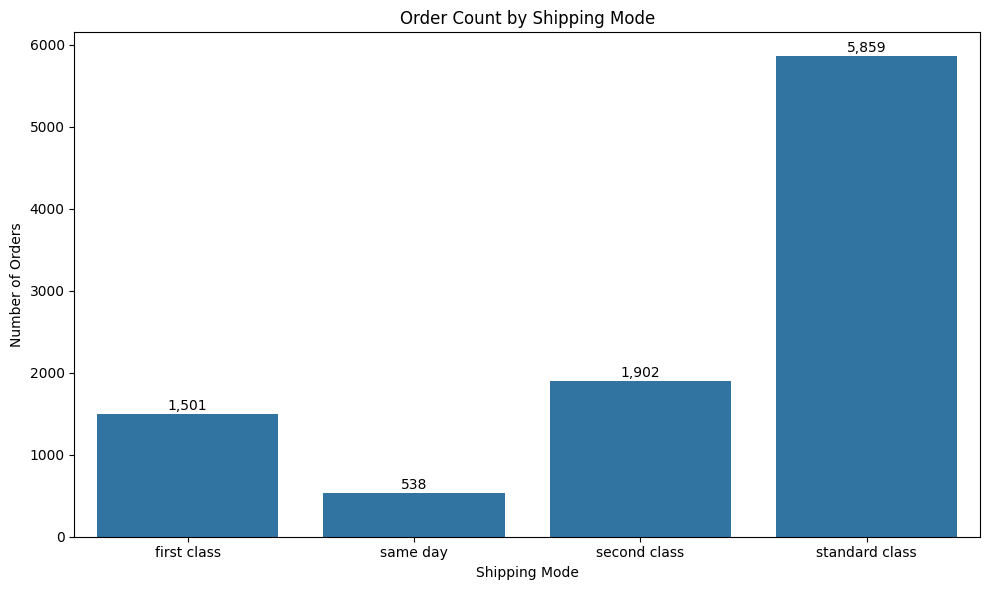

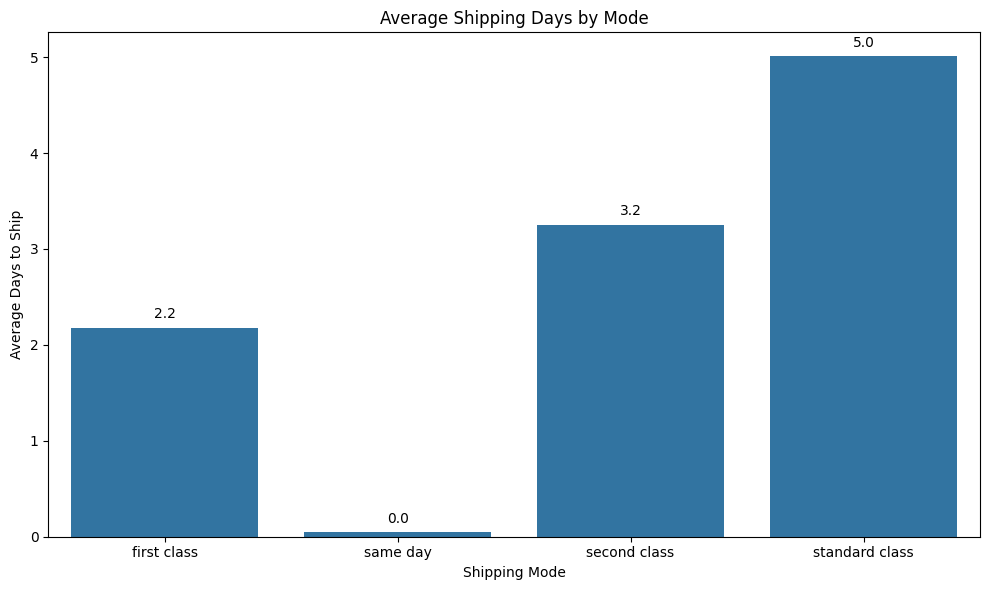

In [41]:
# Visualize shipping modes distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Count', data=merged_shipping)
plt.title('Order Count by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
for i, count in enumerate(merged_shipping['Count']):
    plt.text(i, count + 50, f"{count:,}", ha='center')
plt.tight_layout()
plt.show()

# Shipping days by mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Shipping Days', data=merged_shipping)
plt.title('Average Shipping Days by Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Days to Ship')
for i, days in enumerate(merged_shipping['Shipping Days']):
    plt.text(i, days + 0.1, f"{days:.1f}", ha='center')
plt.tight_layout()
plt.show()

## 3. Sales Performance Analysis

### 3.1 Top Customers Analysis

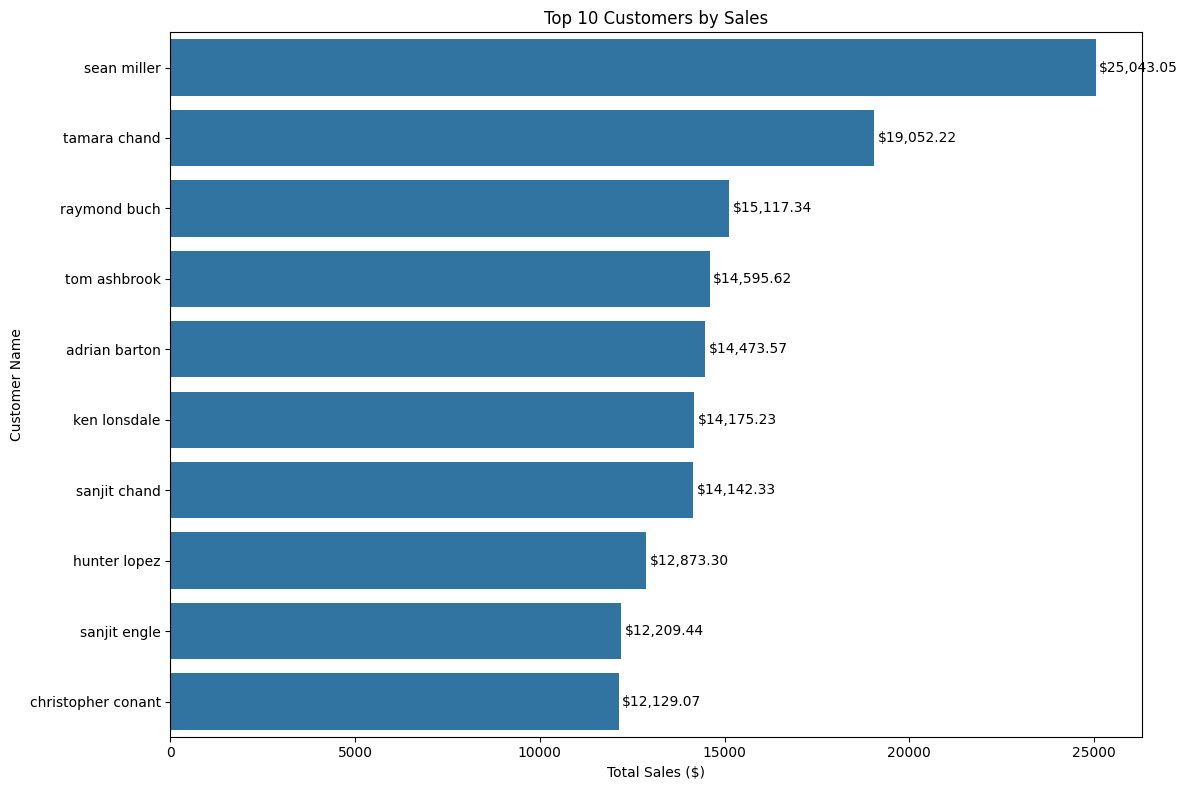

In [42]:
# Top 10 customers by sales
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index()
top_10_customers = customer_sales.sort_values('Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Customer Name', data=top_10_customers)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Name')
for i, sales in enumerate(top_10_customers['Sales']):
    plt.text(sales + 100, i, f"${sales:,.2f}", va='center')
plt.tight_layout()
plt.show()

### 3.2 Product Performance


Top 10 Products by Sales:
1. canon imageclass 2200 advanced copier (technology, copiers): $61,599.82
2. fellowes pb500 electric punch plastic comb binding machine with manual bind (office supplies, binders): $27,453.38
3. cisco telepresence system ex90 videoconferencing unit (technology, machines): $22,638.48
4. hon 5400 series task chairs for big and tall (furniture, chairs): $21,870.58
5. gbc docubind tl300 electric binding system (office supplies, binders): $19,823.48
6. gbc ibimaster 500 manual proclick binding system (office supplies, binders): $19,024.50
7. hewlett packard laserjet 3310 copier (technology, copiers): $18,839.69
8. hp designjet t520 inkjet large format printer - 24" color (technology, machines): $18,374.90
9. gbc docubind p400 electric binding system (office supplies, binders): $17,965.07
10. high speed automatic electric letter opener (office supplies, supplies): $17,030.31


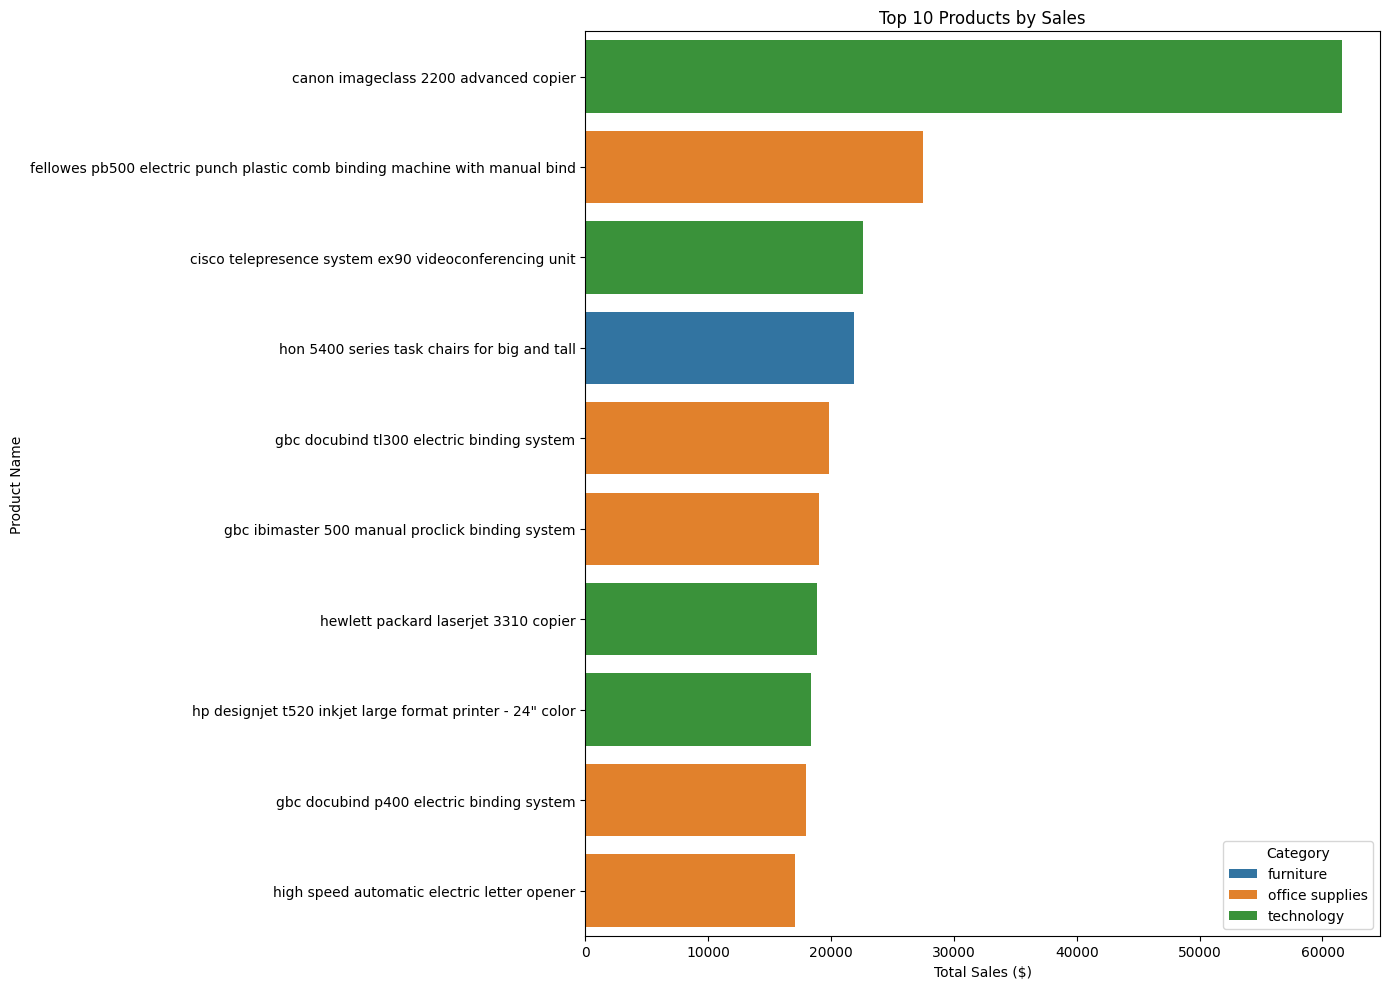

In [43]:
# Top 10 products by sales
product_sales = df.groupby(['Product Name', 'Category', 'Sub-Category'])['Sales'].sum().reset_index()
top_10_products = product_sales.sort_values('Sales', ascending=False).head(10)

print("\nTop 10 Products by Sales:")
for i, (product, category, subcategory, sales) in enumerate(zip(top_10_products['Product Name'], 
                                                               top_10_products['Category'],
                                                               top_10_products['Sub-Category'],
                                                               top_10_products['Sales'])):
    print(f"{i+1}. {product} ({category}, {subcategory}): ${sales:,.2f}")

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Sales', y='Product Name', hue='Category', data=top_10_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## 4. Sales Forecasting

### 4.1 Time Series Decomposition

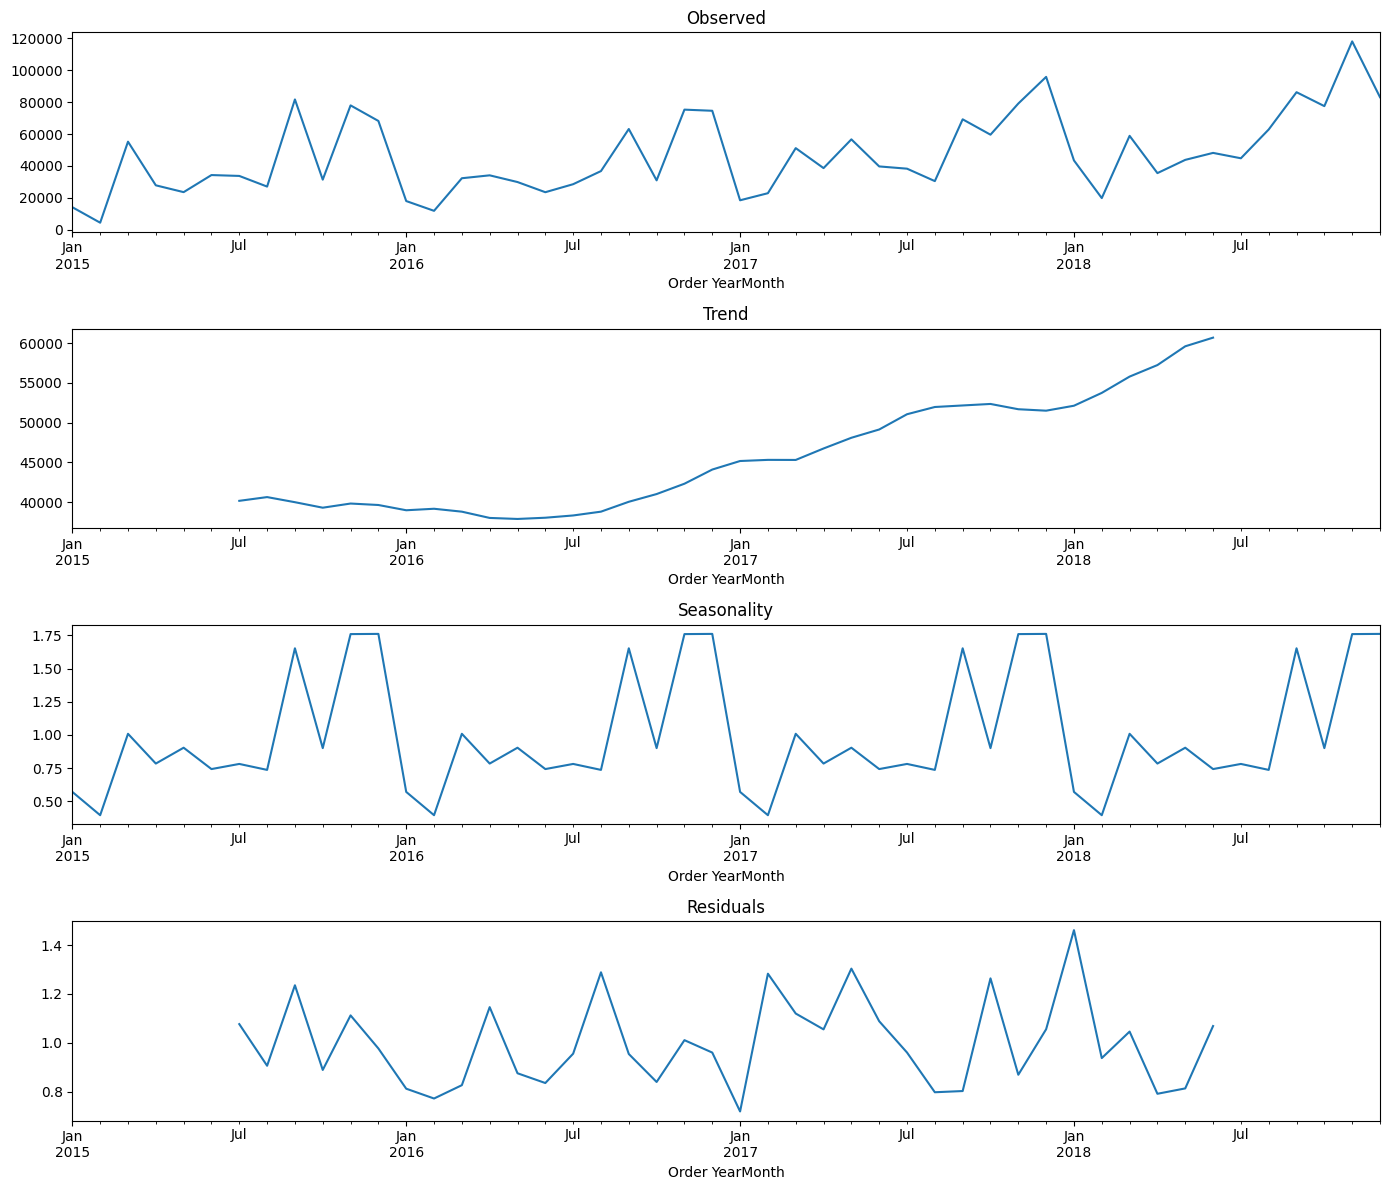

In [44]:
# Convert to time series
monthly_sales_ts = monthly_sales.set_index('Order YearMonth')['Sales']

# Decompose the time series
decomposition = seasonal_decompose(monthly_sales_ts, model='multiplicative', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residuals')
plt.tight_layout()
plt.show()

### 4.2 Sales Forecast Model

In [45]:
monthly_sales_ts = monthly_sales.reset_index()
monthly_sales_ts['Month_Num'] = range(1, len(monthly_sales_ts) + 1)

train_size = int(len(monthly_sales_ts) * 0.8)
train_data = monthly_sales_ts[:train_size]
test_data = monthly_sales_ts[train_size:]

X_train = train_data[['Month_Num']]
y_train = train_data['Sales']
X_test = test_data[['Month_Num']]
y_test = test_data['Sales']

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

train_pred = poly_model.predict(X_train_poly)
test_pred = poly_model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Training RMSE: ${train_rmse:.2f}")
print(f"Test RMSE: ${test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Training RMSE: $20983.83
Test RMSE: $20694.63
Training R²: 0.1246
Test R²: 0.2578


In [46]:
# Forecast sales by category
category_forecasts = {}

num_future_months = 6 
last_month_num = monthly_sales_ts['Month_Num'].max()
future_month_nums = np.array(range(last_month_num + 1, last_month_num + 1 + num_future_months))

future_dates = pd.date_range(start=monthly_sales_ts['Order YearMonth'].max(), periods=num_future_months, freq='M')

for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    
    monthly_category_sales = category_data.groupby('Order YearMonth')['Sales'].sum().reset_index()
    monthly_category_sales['Order YearMonth'] = pd.to_datetime(monthly_category_sales['Order YearMonth'])
    monthly_category_sales = monthly_category_sales.sort_values('Order YearMonth')
    
    monthly_category_sales['Month_Num'] = range(1, len(monthly_category_sales) + 1)
    
    cat_train_size = int(len(monthly_category_sales) * 0.8)
    cat_train_data = monthly_category_sales[:cat_train_size]
    cat_test_data = monthly_category_sales[cat_train_size:]
    
    X_cat_train = cat_train_data[['Month_Num']]
    y_cat_train = cat_train_data['Sales']
    X_cat_test = cat_test_data[['Month_Num']]
    y_cat_test = cat_test_data['Sales']
    
    X_cat_train_poly = poly.fit_transform(X_cat_train)
    X_cat_test_poly = poly.transform(X_cat_test)
    
    cat_poly_model = LinearRegression()
    cat_poly_model.fit(X_cat_train_poly, y_cat_train)
    
    cat_train_pred = cat_poly_model.predict(X_cat_train_poly)
    cat_test_pred = cat_poly_model.predict(X_cat_test_poly)
    
    cat_future_X = poly.transform(future_month_nums.reshape(-1, 1))
    cat_future_predictions = cat_poly_model.predict(cat_future_X)
    
    category_forecasts[category] = {
        'dates': monthly_category_sales['Order YearMonth'],
        'sales': monthly_category_sales['Sales'],
        'train_index': cat_train_size,
        'train_pred': cat_train_pred,
        'test_pred': cat_test_pred,
        'future_dates': future_dates,
        'future_pred': cat_future_predictions
    }

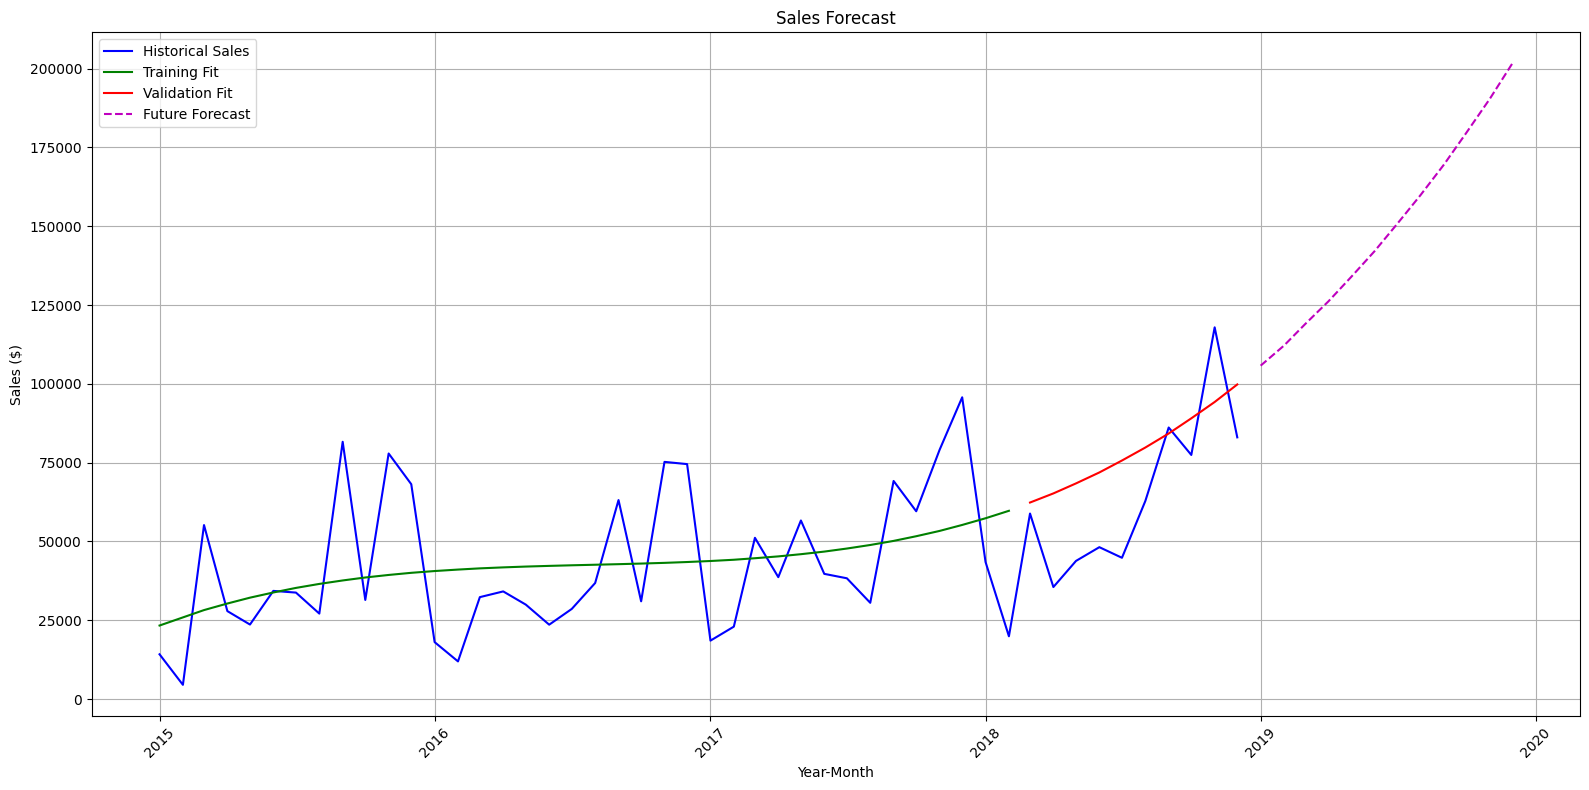


Sales Forecast for the Next 12 Months:
2019-01: $105,775.09
2019-02: $112,149.54
2019-03: $118,950.12
2019-04: $126,191.00
2019-05: $133,886.35
2019-06: $142,050.32
2019-07: $150,697.08
2019-08: $159,840.80
2019-09: $169,495.63
2019-10: $179,675.74
2019-11: $190,395.30
2019-12: $201,668.46


In [47]:
# Create future predictions
future_months = 12
last_month_num = monthly_sales_ts['Month_Num'].max()
future_month_nums = np.array(range(last_month_num + 1, last_month_num + future_months + 1))
future_X = poly.transform(future_month_nums.reshape(-1, 1))
future_predictions = poly_model.predict(future_X)

future_dates = pd.date_range(
    start=monthly_sales_ts['Order YearMonth'].iloc[-1] + pd.DateOffset(months=1),
    periods=future_months,
    freq='MS'
)
forecast_df = pd.DataFrame({
    'Order YearMonth': future_dates,
    'Forecasted_Sales': future_predictions
})

plt.figure(figsize=(16, 8))
plt.plot(monthly_sales_ts['Order YearMonth'], monthly_sales_ts['Sales'], 'b-', label='Historical Sales')
plt.plot(monthly_sales_ts['Order YearMonth'].iloc[:train_size], train_pred, 'g-', label='Training Fit')
plt.plot(monthly_sales_ts['Order YearMonth'].iloc[train_size:], test_pred, 'r-', label='Validation Fit')
plt.plot(forecast_df['Order YearMonth'], forecast_df['Forecasted_Sales'], 'm--', label='Future Forecast')
plt.title('Sales Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nSales Forecast for the Next 12 Months:")
for date, sales in zip(forecast_df['Order YearMonth'], forecast_df['Forecasted_Sales']):
    print(f"{date.strftime('%Y-%m')}: ${sales:,.2f}")


### 4.3 Category-wise Forecast

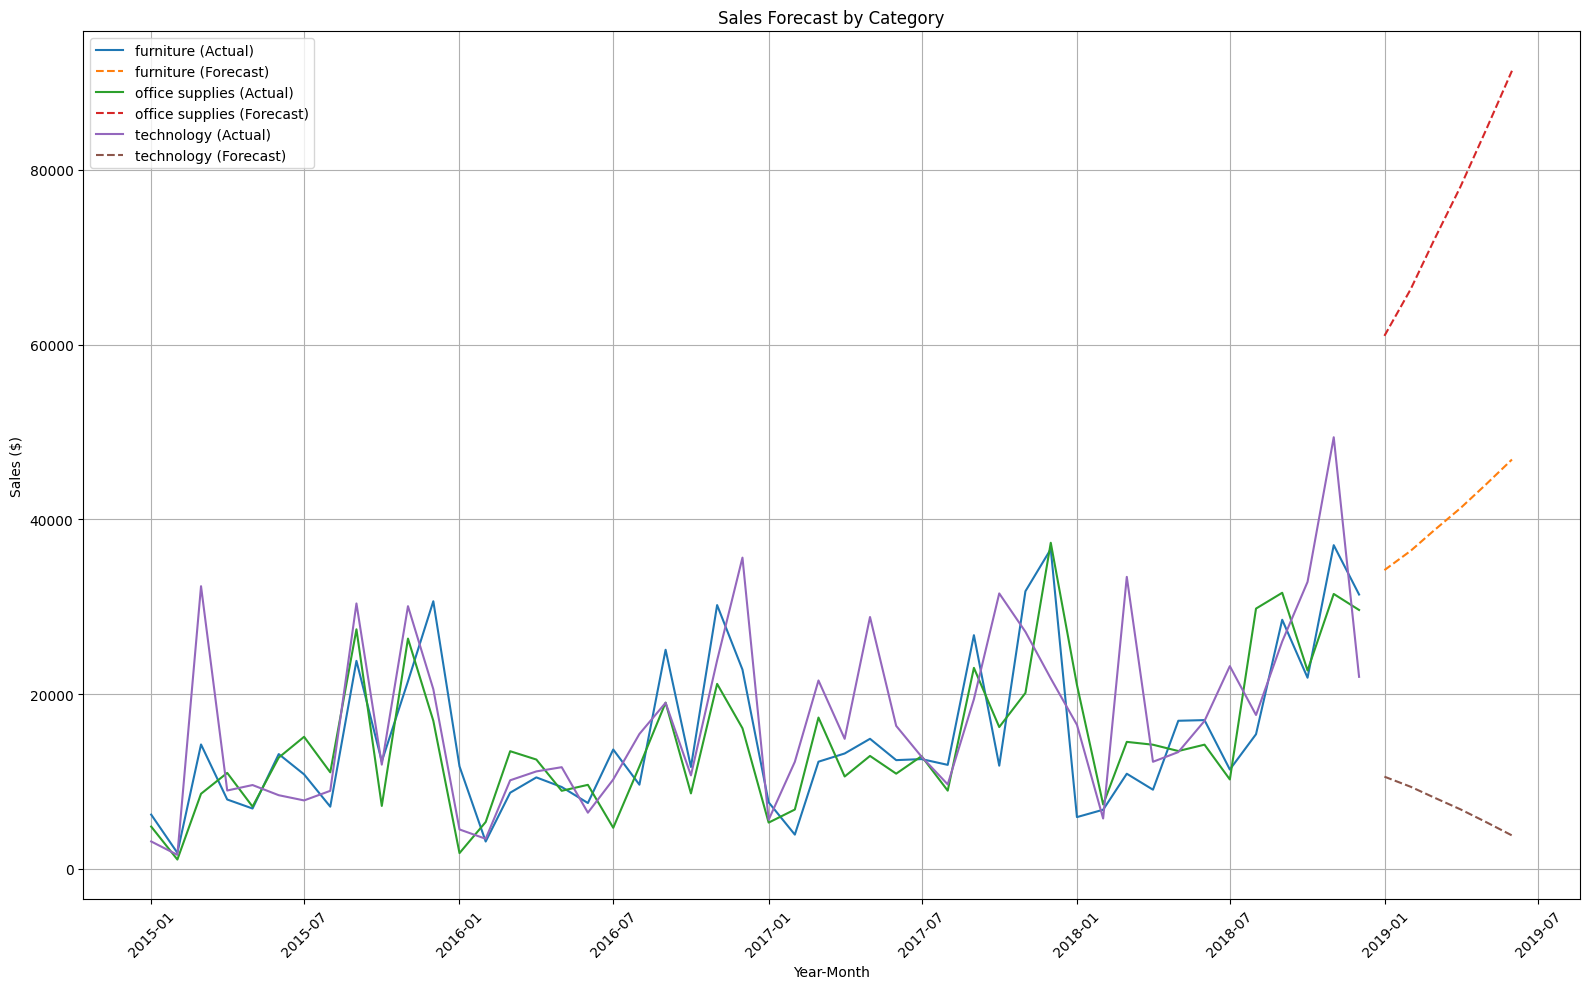

In [48]:
plt.figure(figsize=(16, 10))
for category, forecast in category_forecasts.items():
    plt.plot(forecast['dates'], forecast['sales'], '-', label=f'{category} (Actual)')
    plt.plot(forecast['future_dates'], forecast['future_pred'], '--', label=f'{category} (Forecast)')

plt.title('Sales Forecast by Category')
plt.xlabel('Year-Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Key Insights and Recommendations

Based on the analysis, here are the key findings and strategic recommendations:

1. **Product Category Insights:**
   - Technology products generate the highest sales, followed by Furniture and Office Supplies.
   - Within technology, Phones and Machines are the best performing sub-categories.
   - Recommendation: Invest more marketing resources in high-margin technology products.

2. **Regional Performance:**
   - The Western region leads in sales, while the Southern region has the lowest sales.
   - Recommendation: Develop targeted marketing strategies for the Southern region to boost sales.

3. **Customer Segment Analysis:**
   - Consumer segment contributes the highest percentage of sales.
   - Corporate and Home Office segments show potential for growth.
   - Recommendation: Create specialized product bundles for business customers to increase sales in these segments.

4. **Seasonal Trends:**
   - Sales show clear seasonal patterns with peaks typically occurring in certain months.
   - Recommendation: Plan inventory and promotions around seasonal peaks to maximize revenue.

5. **Shipping Analysis:**
   - Standard shipping is the most popular mode, but express shipping is associated with higher sales values.
   - Recommendation: Offer shipping discounts or promotions to encourage larger order values.

6. **Future Growth Projections:**
   - Based on our forecast model, sales are expected to continue growing over the next 12 months.
   - Technology category shows the strongest growth potential.
   - Recommendation: Prepare inventory and staffing to accommodate projected growth, especially in the technology category.

______________________

# ----- Sales-Related Questions -----

# 1. Which region generates the most sales?


Sales by Region:
west: $710,219.68
east: $669,518.73
central: $492,646.91
south: $389,151.46


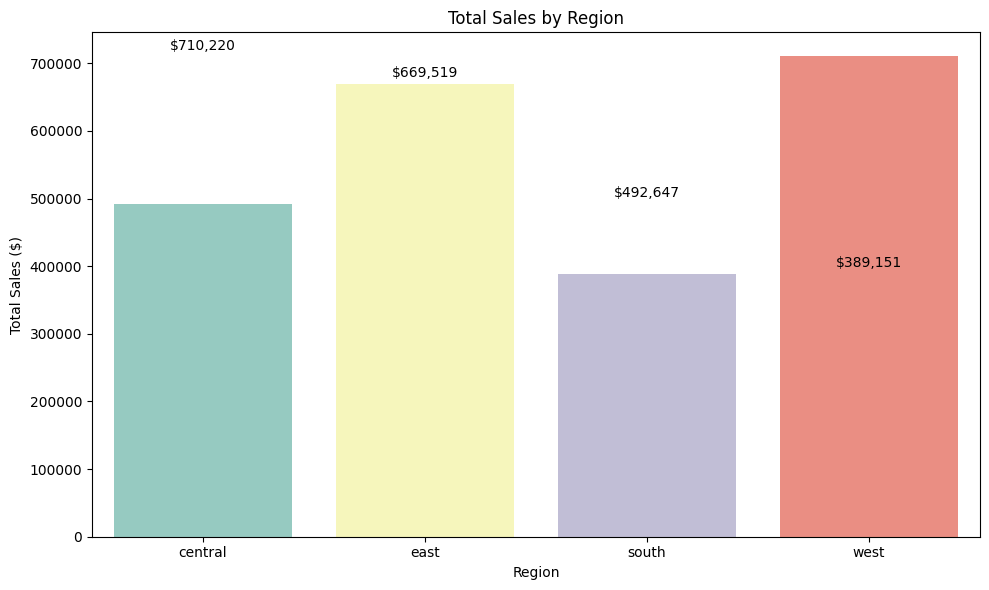

In [49]:
# Sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

print("\nSales by Region:")
for region, sales in zip(region_sales['Region'], region_sales['Sales']):
    print(f"{region}: ${sales:,.2f}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='Set3')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
for i, sales in enumerate(region_sales['Sales']):
    plt.text(i, sales + 10000, f"${sales:,.0f}", ha='center')
plt.tight_layout()
plt.show()

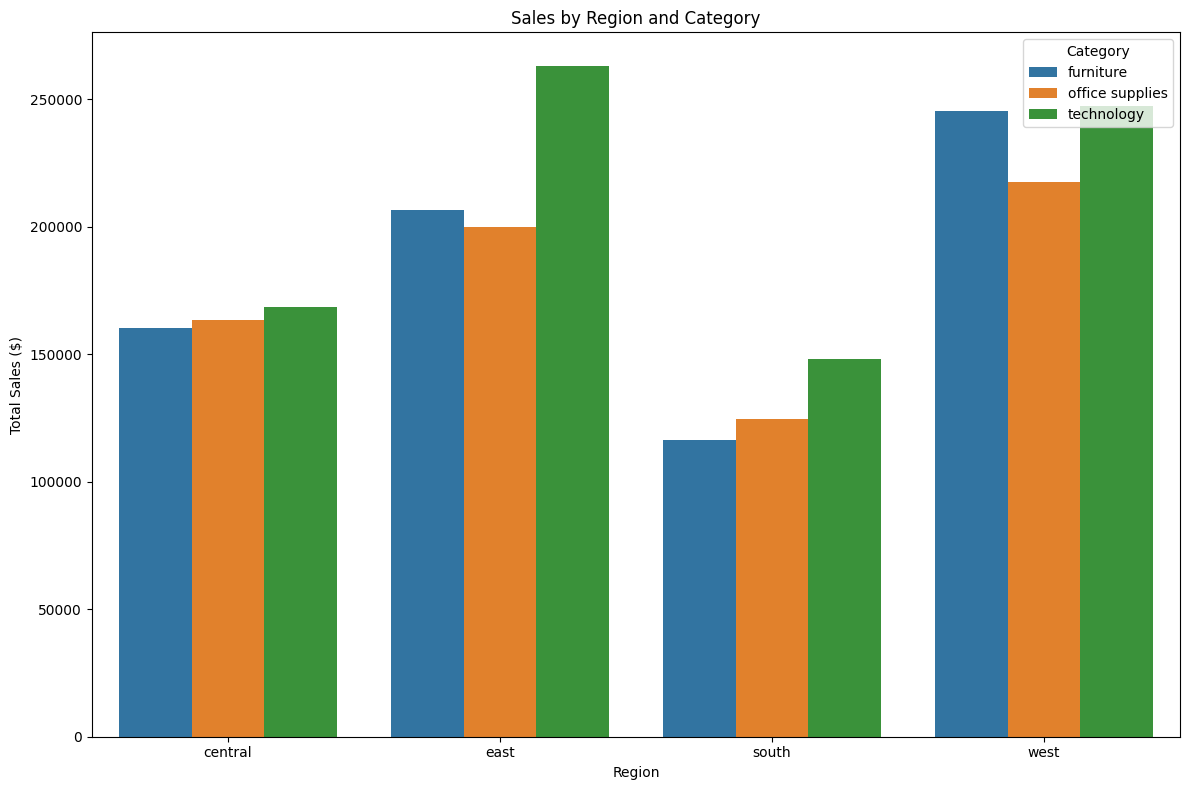

In [50]:
# Regional sales by category
region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', hue='Category', data=region_category)
plt.title('Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()


# 3. What are the Top 10 Cities by Sales?


3. Top 10 Cities by Sales:
1. new york city: $252,462.55
2. los angeles: $173,420.18
3. seattle: $116,106.32
4. san francisco: $109,041.12
5. philadelphia: $108,841.75
6. houston: $63,956.14
7. chicago: $47,820.13
8. san diego: $47,521.03
9. jacksonville: $44,713.18
10. detroit: $42,446.94


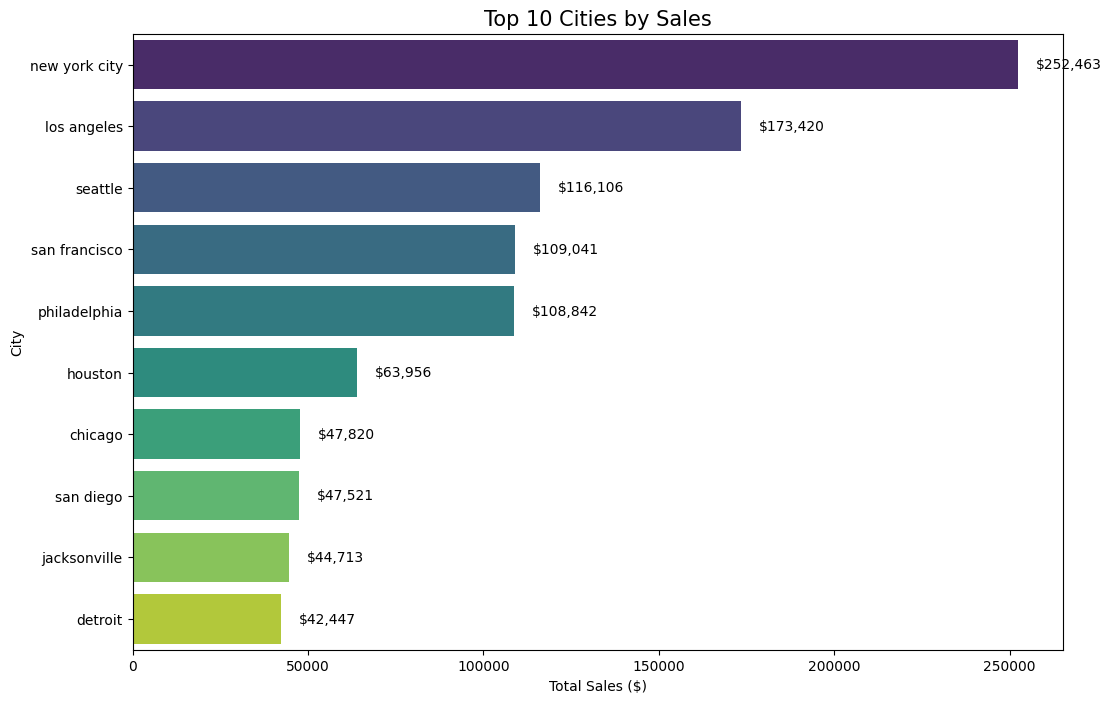

In [51]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_cities = city_sales.head(10)
print("\n3. Top 10 Cities by Sales:")
for i, (city, sales) in enumerate(zip(top_10_cities['City'], top_10_cities['Sales'])):
    print(f"{i+1}. {city}: ${sales:,.2f}")

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='City', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities by Sales', fontsize=15)
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
for i, sales in enumerate(top_10_cities['Sales']):
    plt.text(sales + 5000, i, f"${sales:,.0f}", va='center')

# 4. What is the most selling product in sub-categories?



4. Most Selling Product in Each Sub-Category:
accessories: plantronics cs510 - over-the-head monaural wireless headset system ($10,822.36)
appliances: honeywell enviracaire portable hepa air cleaner for 17' x 22' room ($8,899.24)
art: hunt powerhouse electric pencil sharpener, blue ($1,617.95)
binders: fellowes pb500 electric punch plastic comb binding machine with manual bind ($27,453.38)
bookcases: riverside palais royal lawyers bookcase, royale cherry finish ($15,610.97)
chairs: hon 5400 series task chairs for big and tall ($21,870.58)
copiers: canon imageclass 2200 advanced copier ($61,599.82)
envelopes: cameo buff policy envelopes ($1,456.18)
fasteners: vinyl coated wire paper clips in organizer box, 800/box ($296.18)
furnishings: luxo professional fluorescent magnifier lamp with clamp-mount base ($3,861.06)
labels: dot matrix printer tape reel labels, white, 5000/box ($3,322.88)
machines: cisco telepresence system ex90 videoconferencing unit ($22,638.48)
paper: xerox 1915 ($2,57

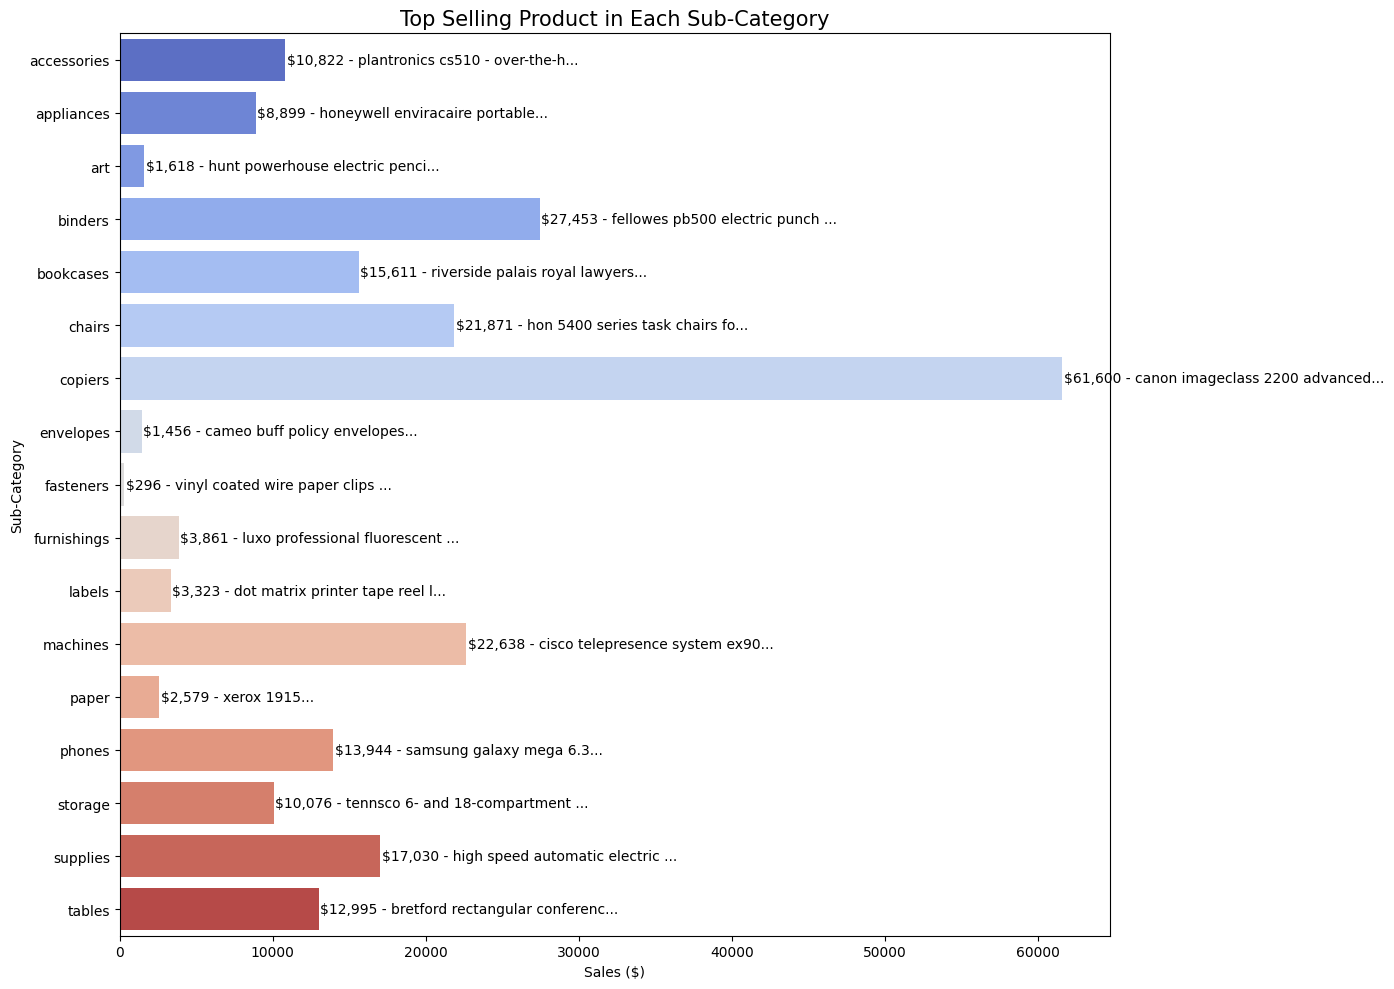

In [52]:
# Group by sub-category and product to find top product in each
top_products_by_subcategory = df.groupby(['Sub-Category', 'Product ID', 'Product Name'])['Sales'].sum().reset_index()
top_products = top_products_by_subcategory.sort_values(['Sub-Category', 'Sales'], ascending=[True, False])
top_products = top_products.groupby('Sub-Category').first().reset_index()

print("\n4. Most Selling Product in Each Sub-Category:")
for sub, product, sales in zip(top_products['Sub-Category'], top_products['Product Name'], top_products['Sales']):
    print(f"{sub}: {product} (${sales:,.2f})")

# Visualize top product in each sub-category
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='Sub-Category', data=top_products, palette='coolwarm')
plt.title('Top Selling Product in Each Sub-Category', fontsize=15)
plt.xlabel('Sales ($)')
plt.ylabel('Sub-Category')
for i, (prod, sales) in enumerate(zip(top_products['Product Name'], top_products['Sales'])):
    plt.text(sales + 100, i, f"${sales:,.0f} - {prod[:30]}...", va='center')
plt.tight_layout()

# ----- Shipping and Order-Related Questions -----


# 5. How many orders for each product category?


5. Number of Orders by Product Category:
furniture: 1,727 orders
office supplies: 3,676 orders
technology: 1,519 orders


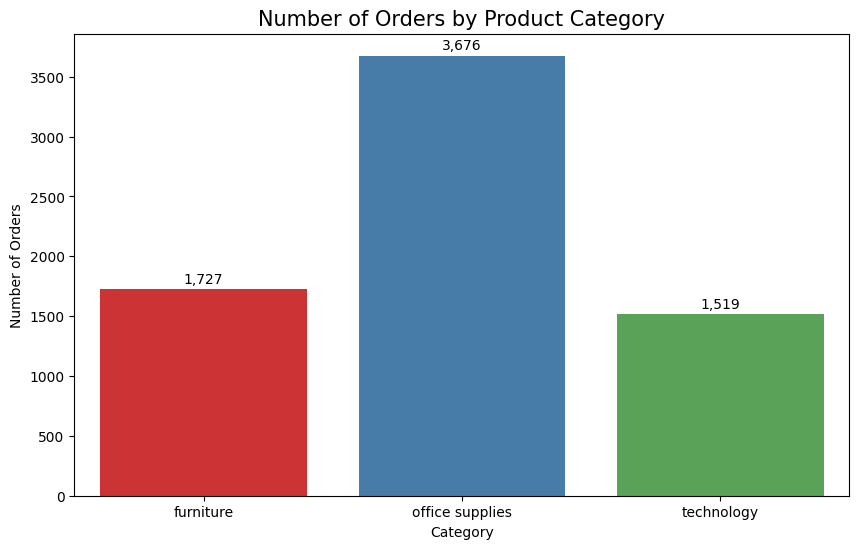

In [53]:
# Count unique orders per category
orders_by_category = df.groupby('Category')['Order ID'].nunique().reset_index()
orders_by_category.columns = ['Category', 'Number of Orders']
print("\n5. Number of Orders by Product Category:")
for category, count in zip(orders_by_category['Category'], orders_by_category['Number of Orders']):
    print(f"{category}: {count:,} orders")

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Number of Orders', data=orders_by_category, palette='Set1')
plt.title('Number of Orders by Product Category', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Number of Orders')
for i, count in enumerate(orders_by_category['Number of Orders']):
    plt.text(i, count + 50, f"{count:,}", ha='center')

# 6. What is the average sales amount per order?



6. Average Sales Amount per Order: $459.48


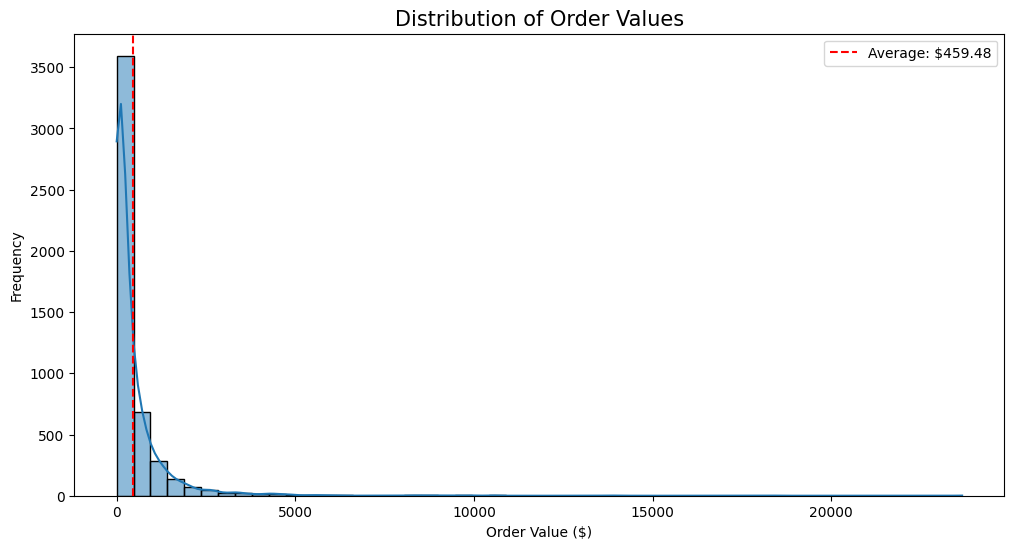

In [54]:
order_sales = df.groupby('Order ID')['Sales'].sum()
avg_order_value = order_sales.mean()
print(f"\n6. Average Sales Amount per Order: ${avg_order_value:.2f}")

# Distribution of order values
plt.figure(figsize=(12, 6))
sns.histplot(order_sales, bins=50, kde=True)
plt.axvline(avg_order_value, color='red', linestyle='--', 
            label=f'Average: ${avg_order_value:.2f}')
plt.title('Distribution of Order Values', fontsize=15)
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.legend()

# 7. How many orders by date?


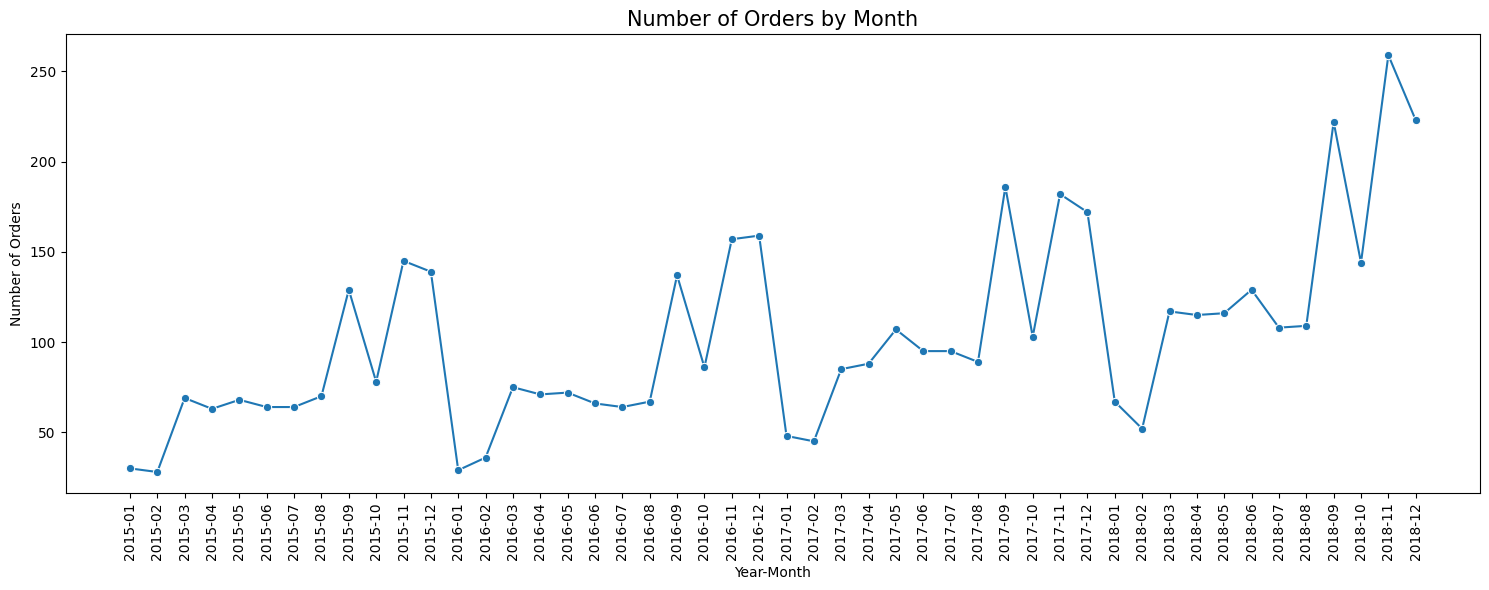

In [55]:
# Group by Year and Month correctly
orders_by_date = df.groupby([df['Order Date'].dt.to_period('M')])['Order ID'].nunique().reset_index()
orders_by_date.columns = ['YearMonth', 'Number of Orders']
orders_by_date['YearMonth'] = orders_by_date['YearMonth'].astype(str)
orders_by_date = orders_by_date.sort_values('YearMonth')

plt.figure(figsize=(15, 6))
sns.lineplot(x='YearMonth', y='Number of Orders', data=orders_by_date, marker='o')
plt.title('Number of Orders by Month', fontsize=15)
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# ----- Geographic Distribution -----


# 8. What is the sales distribution by state?



8. Top 10 States by Sales:
1. california: $446,306.46
2. new york: $306,361.15
3. texas: $168,572.53
4. washington: $135,206.85
5. pennsylvania: $116,276.65
6. florida: $88,436.53
7. illinois: $79,236.52
8. michigan: $76,136.07
9. ohio: $75,130.35
10. virginia: $70,636.72


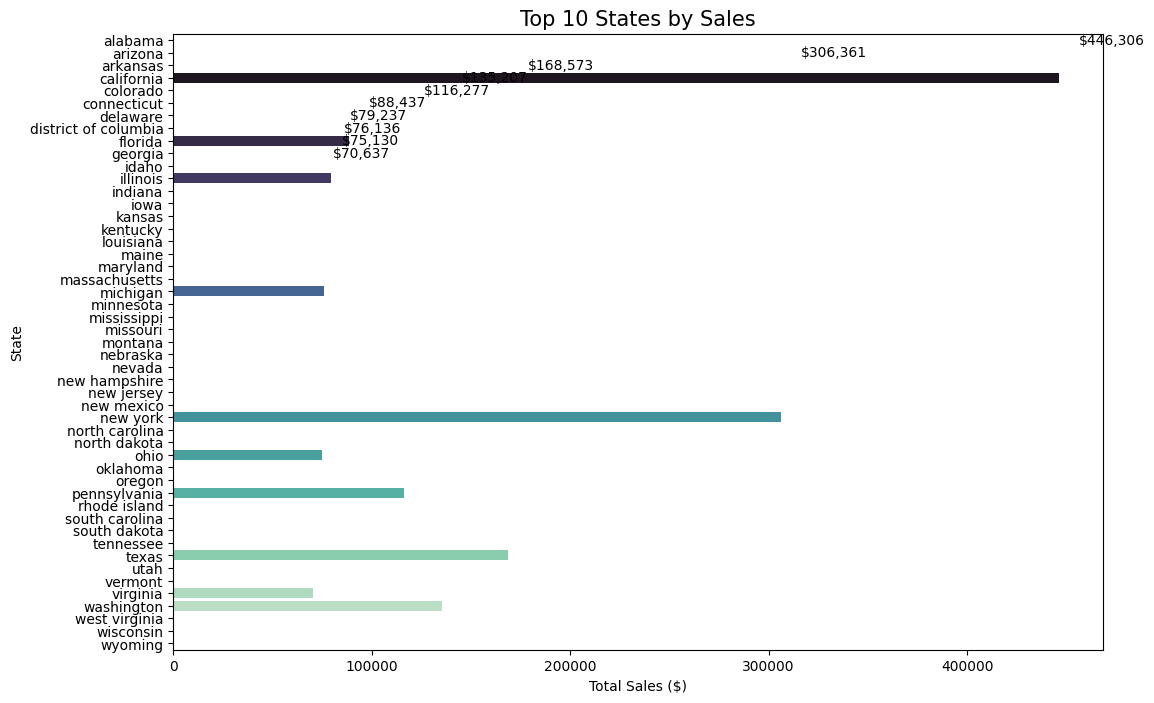

In [56]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_states = state_sales.head(10)
print("\n8. Top 10 States by Sales:")
for i, (state, sales) in enumerate(zip(top_10_states['State'], top_10_states['Sales'])):
    print(f"{i+1}. {state}: ${sales:,.2f}")

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='State', data=top_10_states, palette='mako')
plt.title('Top 10 States by Sales', fontsize=15)
plt.xlabel('Total Sales ($)')
plt.ylabel('State')
for i, sales in enumerate(top_10_states['Sales']):
    plt.text(sales + 10000, i, f"${sales:,.0f}", va='center')

# 9. Which products are most popular in each region?



9. Most Popular Products by Region (by Sales):
south:
  1. cisco telepresence system ex90 videoconferencing unit: $22,638.48
  2. hp designjet t520 inkjet large format printer - 24" color: $11,374.94
  3. gbc docubind tl300 electric binding system: $8,342.01
west:
  1. canon imageclass 2200 advanced copier: $13,999.96
  2. high speed automatic electric letter opener: $13,100.24
  3. global troy executive leather low-back tilter: $10,019.60
central:
  1. canon imageclass 2200 advanced copier: $17,499.95
  2. lexmark mx611dhe monochrome laser printer: $14,279.92
  3. ibico epk-21 electric binding system: $11,339.94
east:
  1. canon imageclass 2200 advanced copier: $30,099.91
  2. 3d systems cube printer, 2nd generation, magenta: $14,299.89
  3. riverside palais royal lawyers bookcase, royale cherry finish: $11,717.03


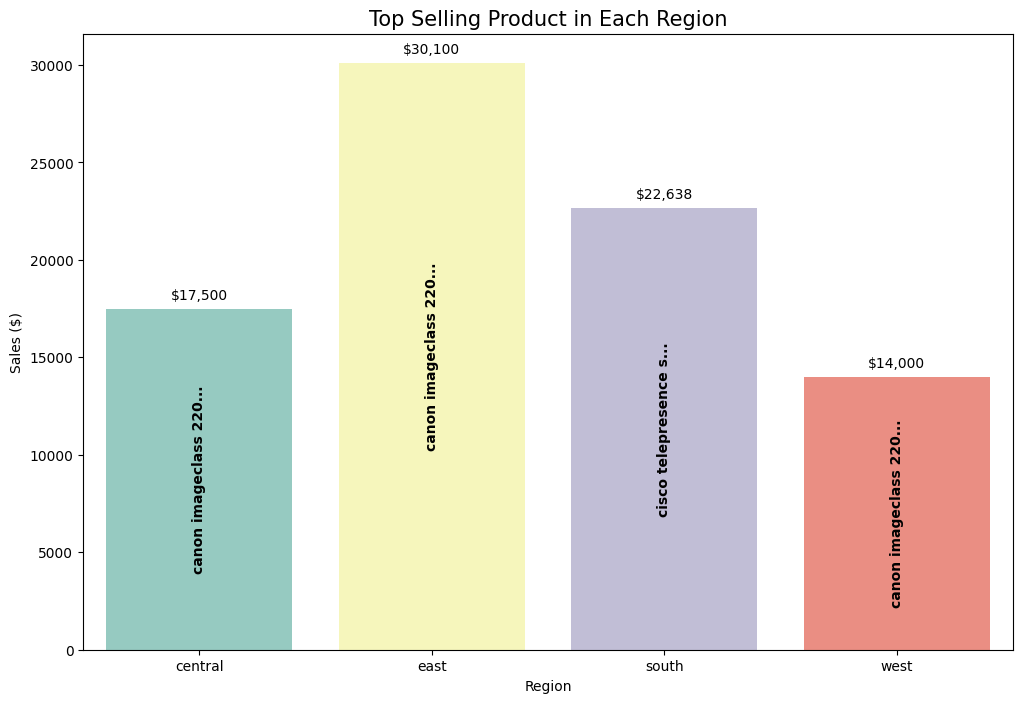

In [57]:
# Group by region and product to find top products in each region
region_product_sales = df.groupby(['Region', 'Product ID', 'Product Name'])['Sales'].sum().reset_index()
region_product_sales = region_product_sales.sort_values(['Region', 'Sales'], ascending=[True, False])
top_products_by_region = region_product_sales.groupby('Region').head(3).reset_index()

print("\n9. Most Popular Products by Region (by Sales):")
for region in df['Region'].unique():
    region_products = top_products_by_region[top_products_by_region['Region'] == region]
    print(f"{region}:")
    for i, (product, sales) in enumerate(zip(region_products['Product Name'], region_products['Sales'])):
        print(f"  {i+1}. {product}: ${sales:,.2f}")

top_one_product = region_product_sales.groupby('Region').first().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data=top_one_product, palette='Set3')
plt.title('Top Selling Product in Each Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Sales ($)')
for i, (prod, sales) in enumerate(zip(top_one_product['Product Name'], top_one_product['Sales'])):
    plt.text(i, sales + 500, f"${sales:,.0f}", ha='center')
    plt.text(i, sales/2, f"{prod[:20]}...", ha='center', va='center', color='black', fontweight='bold', rotation=90)


# 10. What is the most categories sold by state?


In [58]:
# Find the top category by sales for each state
state_category_sales = df.groupby(['State', 'Category'])['Sales'].sum().reset_index()
top_category_by_state = state_category_sales.loc[state_category_sales.groupby('State')['Sales'].idxmax()]
top_category_by_state = top_category_by_state.sort_values('Sales', ascending=False)

print("\n10. Most Sold Category by State (Top 10):")
for i, (state, category, sales) in enumerate(zip(
    top_category_by_state.head(10)['State'], 
    top_category_by_state.head(10)['Category'], 
    top_category_by_state.head(10)['Sales']
)):
    print(f"{i+1}. {state}: {category} (${sales:,.2f})")


10. Most Sold Category by State (Top 10):
1. california: technology ($154,684.18)
2. new york: technology ($126,902.69)
3. texas: technology ($64,656.27)
4. washington: technology ($50,536.71)
5. florida: technology ($46,968.04)
6. pennsylvania: technology ($42,064.07)
7. michigan: office supplies ($37,688.20)
8. ohio: technology ($34,550.55)
9. illinois: technology ($31,637.88)
10. georgia: office supplies ($26,397.78)


# ----- Segment-Related Questions -----

# 11. Which customer segment has the highest sales?


(-1.099999978143406,
 1.0999996659808484,
 -1.0999999608098974,
 1.0999999981338047)

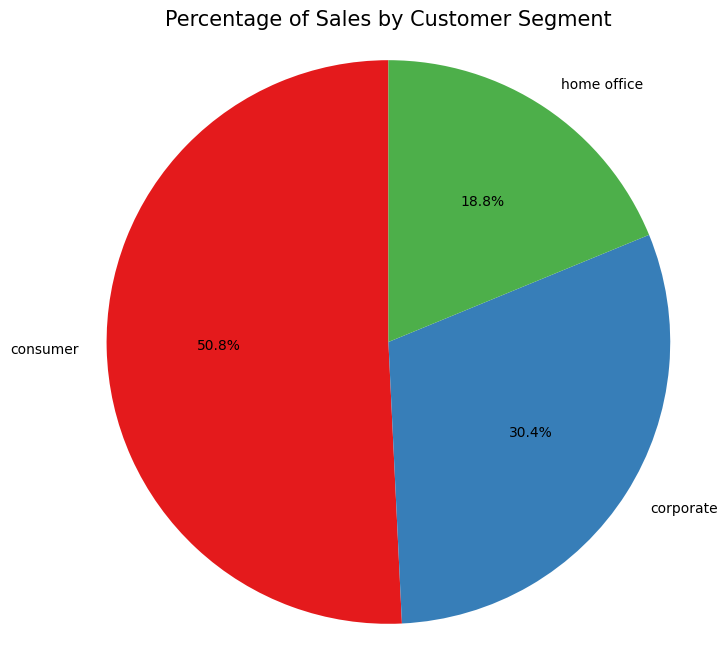

In [59]:
# Percentage of sales by segment
plt.figure(figsize=(8, 8))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set1'))
plt.title('Percentage of Sales by Customer Segment', fontsize=15)
plt.axis('equal')

# 12. How many orders for each customer segment?



12. Number of Orders by Customer Segment:
consumer: 2,537 orders
corporate: 1,491 orders
home office: 894 orders


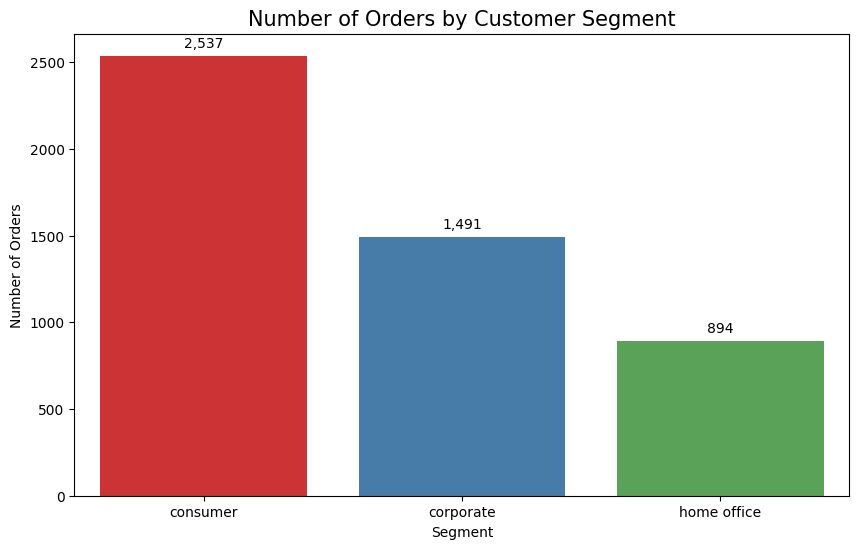

In [60]:
orders_by_segment = df.groupby('Segment')['Order ID'].nunique().reset_index()
orders_by_segment.columns = ['Segment', 'Number of Orders']
print("\n12. Number of Orders by Customer Segment:")
for segment, count in zip(orders_by_segment['Segment'], orders_by_segment['Number of Orders']):
    print(f"{segment}: {count:,} orders")

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Number of Orders', data=orders_by_segment, palette='Set1')
plt.title('Number of Orders by Customer Segment', fontsize=15)
plt.xlabel('Segment')
plt.ylabel('Number of Orders')
for i, count in enumerate(orders_by_segment['Number of Orders']):
    plt.text(i, count + 50, f"{count:,}", ha='center')

# 13. Which products are the most popular among each customer segment?


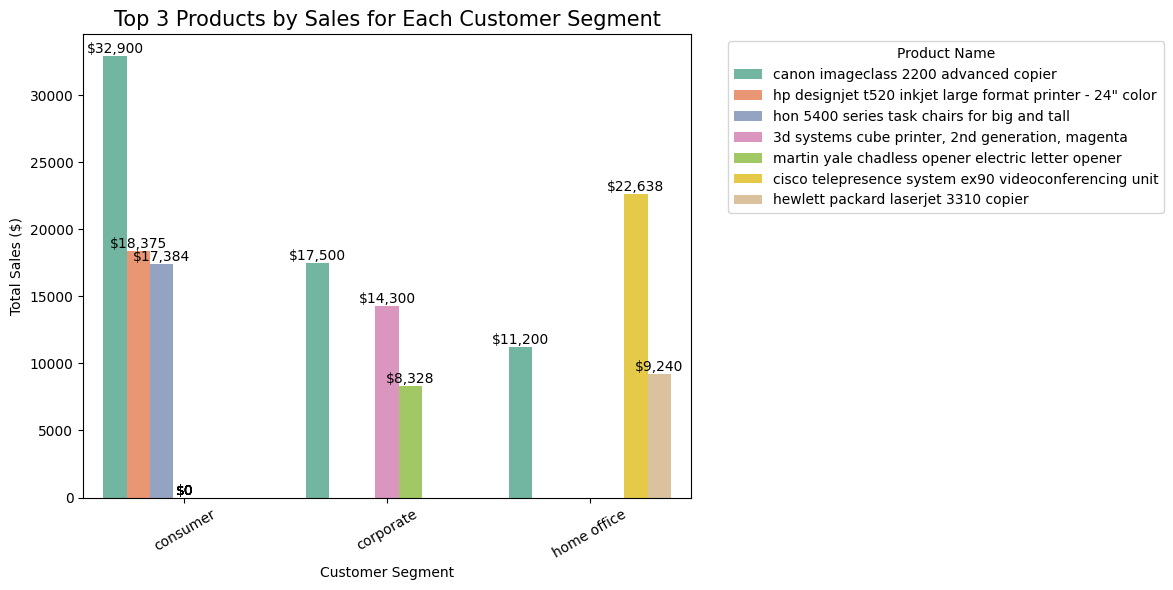

In [61]:
segment_product_sales = df.groupby(['Segment', 'Product ID', 'Product Name'])['Sales'].sum().reset_index()
segment_product_sales = segment_product_sales.sort_values(['Segment', 'Sales'], ascending=[True, False])
top_products_by_segment = segment_product_sales.groupby('Segment').head(3).reset_index(drop=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Segment', y='Sales', hue='Product Name', data=top_products_by_segment, palette='Set2')
plt.title('Top 3 Products by Sales for Each Customer Segment', fontsize=15)
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')

plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


__________________________

# 📊 Sales Data Deep Dive: Unveiling the Patterns 📈

## 🌎 Regional Performance Breakdown

The West and East regions dominate our market, while the Canon ImageClass 2200 copier emerges as a cross-regional superstar! 🌟

---

## 🏆 Product Champions

Office supplies drive volume (3,676 orders), but technology products likely deliver higher margins! 💰

---

## 🗺️ Geographic Gold Mines

California reigns supreme with $446K in sales, with NYC and LA serving as urban powerhouses! 🏙️

---

## 👥 Customer Segment Analysis

Consumers drive half of our business, but each segment has distinct product preferences worth targeting! 🎯

---

## 📈 Order Trends & Patterns

Most orders are under $1K, but we're seeing exciting growth and clear seasonal patterns! 🚀

---

## 🚀 Strategic Recommendations

1. **Product Strategy**: Leverage the Canon ImageClass 2200's star power while bundling high-margin tech with frequently ordered supplies
2. **Regional Approach**: Strengthen West/East dominance while creating targeted South region growth initiatives
3. **Segment Targeting**: Customize offerings for each segment's unique preferences (e.g., videoconferencing for home offices)
4. **Geographic Focus**: Intensify marketing in CA/NY while identifying emerging market opportunities
5. **Seasonal Planning**: Prepare for the end-of-year rush with optimized inventory and promotional calendars

*Next steps: Run A/B tests on key recommendations and implement quarterly tracking metrics* 📝